### Problem Statement:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [3]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [4]:
pd.set_option('display.max_rows',None)

In [5]:
data_table=[]

for i in df.columns:
    data_table.append([i,df[i].nunique(),df[i].drop_duplicates().values])
    
pd.DataFrame(data_table,columns=['features','Unique Number','Unique Values'])

features  Unique Number  \
0            months_as_customer            391   
1                           age             46   
2                 policy_number           1000   
3              policy_bind_date            951   
4                  policy_state              3   
5                    policy_csl              3   
6             policy_deductable              3   
7         policy_annual_premium            991   
8                umbrella_limit             11   
9                   insured_zip            995   
10                  insured_sex              2   
11      insured_education_level              7   
12           insured_occupation             14   
13              insured_hobbies             20   
14         insured_relationship              6   
15                capital-gains            338   
16                 capital-loss            354   
17                incident_date             60   
18                incident_type              4   
19               collision_type              4   
20            incident_severity              4   
21        authorities_contacted              5   
22               incident_state              7   
23                incident_city              7   
24            incident_location           1000   
25     incident_hour_of_the_day             24   
26  number_of_vehicles_involved              4   
27              property_damage              3   
28              bodily_injuries              3   
29                    witnesses              4   
30      police_report_available              3   
31           total_claim_amount            763   
32                 injury_claim            638   
33               property_claim            626   
34                vehicle_claim            726   
35                    auto_make             14   
36                   auto_model             39   
37                    auto_year             21   
38               fraud_reported              2   
39                         _c39              0   

                                        Unique Values  
0   [328, 228, 134, 256, 137, 165, 27, 212, 235, 4...  
1   [48, 42, 29, 41, 44, 39, 34, 37, 33, 61, 23, 3...  
2   [521585, 342868, 687698, 227811, 367455, 10459...  
3   [17-10-2014, 27-06-2006, 06-09-2000, 25-05-199...  
4                                        [OH, IN, IL]  
5                        [250/500, 100/300, 500/1000]  
6                                   [1000, 2000, 500]  
7   [1406.91, 1197.22, 1413.14, 1415.74, 1583.91, ...  
8   [0, 5000000, 6000000, 4000000, 3000000, 800000...  
9   [466132, 468176, 430632, 608117, 610706, 47845...  
10                                     [MALE, FEMALE]  
11  [MD, PhD, Associate, Masters, High School, Col...  
12  [craft-repair, machine-op-inspct, sales, armed...  
13  [sleeping, reading, board-games, bungie-jumpin...  
14  [husband, other-relative, own-child, unmarried...  
15  [53300, 0, 35100, 48900, 66000, 38400, 52800, ...  
16  [0, -62400, -46000, -77000, -39300, -51000, -3...  
17  [25-01-2015, 21-01-2015, 22-02-2015, 10-01-201...  
18  [Single Vehicle Collision, Vehicle Theft, Mult...  
19  [Side Collision, ?, Rear Collision, Front Coll...  
20  [Major Damage, Minor Damage, Total Loss, Trivi...  
21             [Police, None, Fire, Other, Ambulance]  
22                       [SC, VA, NY, OH, WV, NC, PA]  
23  [Columbus, Riverwood, Arlington, Springfield, ...  
24  [9935 4th Drive, 6608 MLK Hwy, 7121 Francis La...  
25  [5, 8, 7, 20, 19, 0, 23, 21, 14, 22, 9, 12, 15...  
26                                       [1, 3, 4, 2]  
27                                       [YES, ?, NO]  
28                                          [1, 0, 2]  
29                                       [2, 0, 3, 1]  
30                                       [YES, ?, NO]  
31  [71610, 5070, 34650, 63400, 6500, 64100, 78650...  
32  [6510, 780, 7700, 6340, 1300, 6410, 21450, 938...  
33  [13020, 780, 3850, 6340, 650, 6410, 7150, 9380...  
34  [52080, 

We will replace features containing unwanted data, such as '?', during the data preprocessing phase.

In [6]:
#Checking Datatypes and Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
#Checking for null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<Axes: >

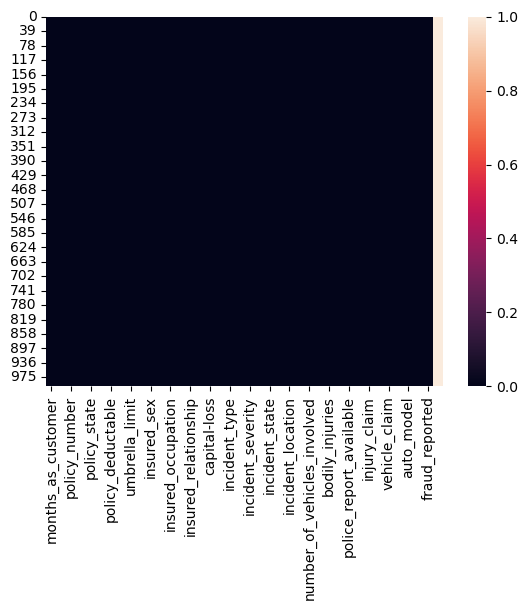

In [8]:
#Let's visualized null values.
sns.heatmap(df.isnull())

In [9]:
categorical_features=[features for features in df.columns if df[features].dtype=='O']
print('length of categorical_features',len(categorical_features))
categorical_features

length of categorical_features 21


['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [10]:
numerical_features=[features for features in df.columns if df[features].dtype!='O']
print('Length of numerical features',len(numerical_features))
numerical_features

Length of numerical features 19


['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 '_c39']

In [11]:
continues_features=[features for features in df[numerical_features] if len(df[features].unique())>25]
print('Length of continues_features',len(continues_features))
continues_features

Length of continues_features 11


['months_as_customer',
 'age',
 'policy_number',
 'policy_annual_premium',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim']

In [12]:
discreat_features=[features for features in df[numerical_features] if len(df[features].unique())<25]
print('Length of discreat_features',len(discreat_features))
discreat_features

Length of discreat_features 8


['policy_deductable',
 'umbrella_limit',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'auto_year',
 '_c39']

In [13]:
year_features=[features for features in df[numerical_features] if "date" in features or 'year' in features]
print('Length Of year_features',len(year_features))
year_features

Length Of year_features 1


['auto_year']

### Visualization

#### Binary visualization 

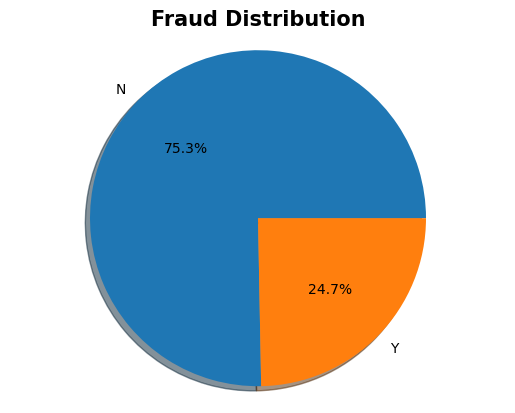

In [14]:
x=(df['fraud_reported']).value_counts()
plt.title('Fraud Distribution',fontdict={'fontweight':'bold','fontsize':15})
plt.pie(x,labels=x.index,shadow=True, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

24.70% of applicants are found to be fraudulent, which is a significant concern for the company.

Now, let's consider the policy annual premium as income for the company and the total claim amount as expenses or outcomes of the company. From this, we will determine whether the company is making a profit or incurring a loss.

In [15]:
df['Profit/Loss']=((df['months_as_customer']/12)*(df['policy_annual_premium']))-(df['total_claim_amount'])
df['Profit/Loss'].values.sum()

-31396110.803333335

Here the amount is negative, so the company is experiencing a loss.

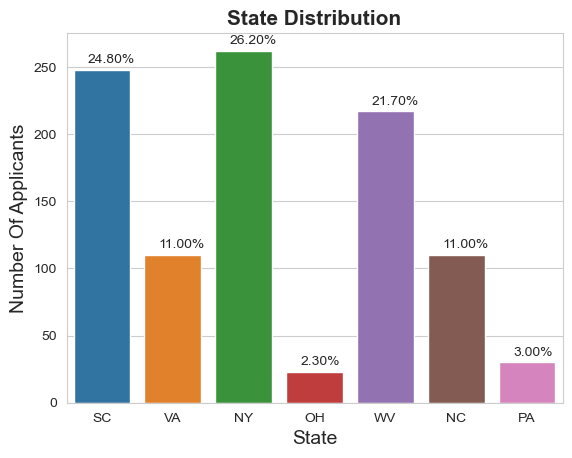

In [17]:
sns.set_style("whitegrid")
ax = sns.countplot(data=df, x='incident_state')
plt.title('State Distribution', fontdict={'fontweight':'bold', 'fontsize':15})
plt.ylabel("Number Of Applicants", fontsize=14)
plt.xlabel('State', fontsize=14)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height() / len(df) * 100), 
                (p.get_x() + 0.2, p.get_height() + 5))

plt.show()

The majority of applicants are from the states of SC and NY, while OH and PA have significantly fewer applicants.

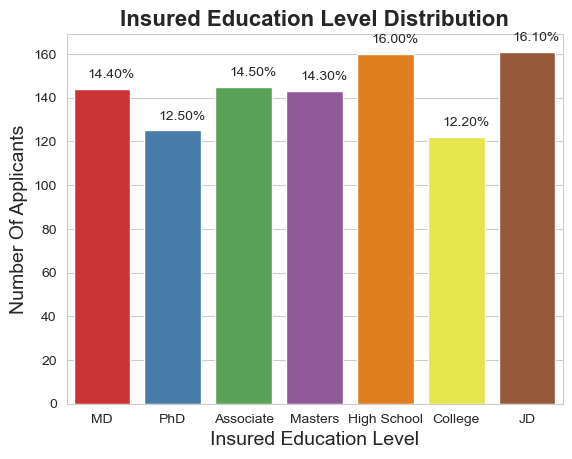

In [19]:
sns.set_style("whitegrid")
ax = sns.countplot(data=df, x='insured_education_level', palette='Set1')
plt.title('Insured Education Level Distribution', fontdict={'fontweight':'bold', 'fontsize':16})
plt.ylabel("Number Of Applicants", fontsize=14)
plt.xlabel('Insured Education Level', fontsize=14)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height() / len(df) * 100), 
                (p.get_x() + 0.2, p.get_height() + 5))

plt.show()

Text(0, 0.5, 'insured_occupation')

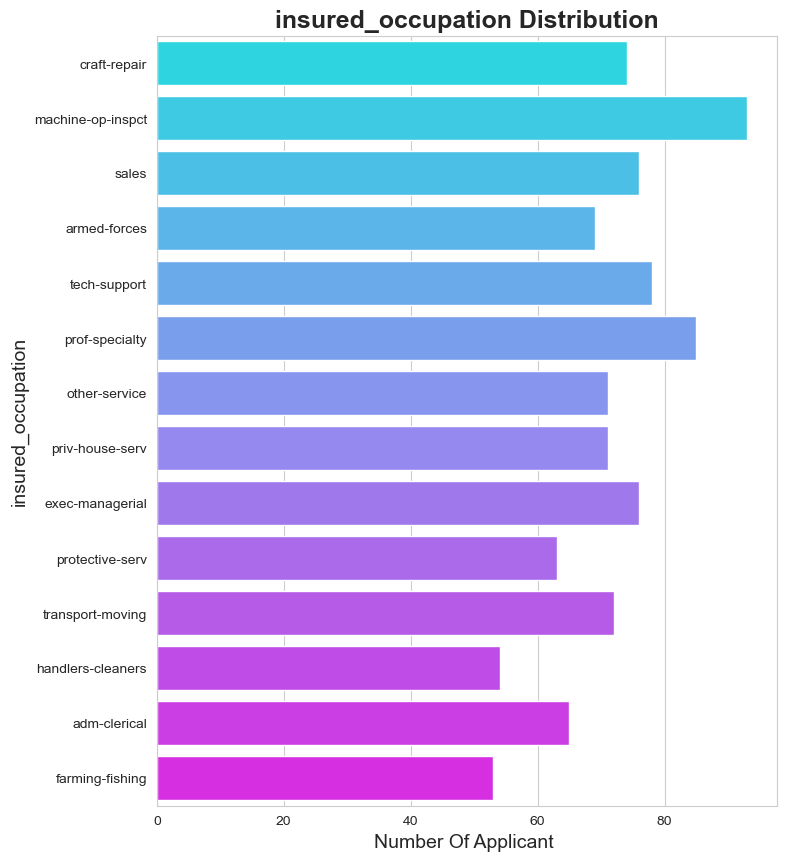

In [20]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,10))
ax=sns.countplot(y=df['insured_occupation'],palette='cool')
plt.title('insured_occupation Distribution',fontdict={'fontweight':'bold','fontsize':18})
plt.xlabel("Number Of Applicant ",fontsize=14)
plt.ylabel('insured_occupation',fontsize=14)

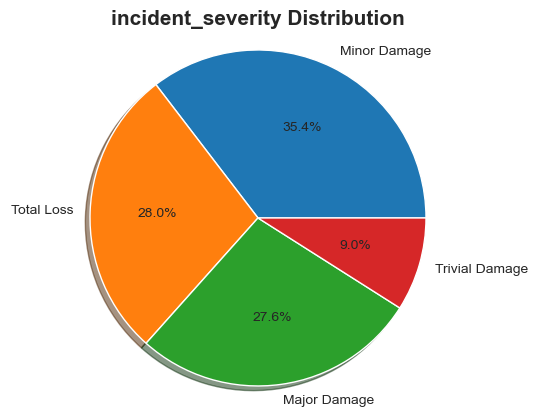

In [21]:
x=(df['incident_severity']).value_counts()
plt.title('incident_severity Distribution',fontdict={'fontweight':'bold','fontsize':15})
plt.pie(x,labels=x.index,shadow=True, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

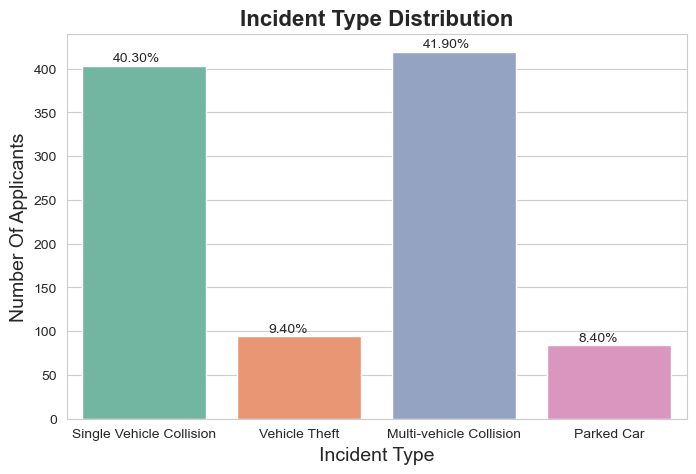

In [23]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='incident_type', palette='Set2')
plt.title('Incident Type Distribution', fontdict={'fontweight':'bold', 'fontsize':16})
plt.ylabel("Number Of Applicants", fontsize=14)
plt.xlabel('Incident Type', fontsize=14)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height() / len(df) * 100), 
                (p.get_x() + 0.2, p.get_height() + 5))

plt.show()

From this chart, we can see that most of the claims are for vehicle collisions, whether they involve a single vehicle or multiple vehicles.

The claim frequency for vehicle theft and parked car incidents is lower.

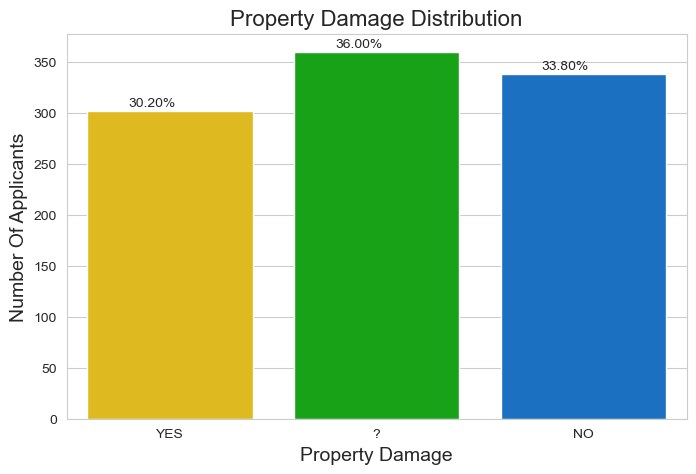

In [25]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='property_damage', palette='nipy_spectral_r')
plt.title('Property Damage Distribution', fontdict={'fontweight':'normal', 'fontsize':16})
plt.ylabel("Number Of Applicants", fontsize=14)
plt.xlabel('Property Damage', fontsize=14)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height() / len(df) * 100), 
                (p.get_x() + 0.2, p.get_height() + 5))

plt.show()

Here, some data are missing or unwanted, so we will replace them during the data preprocessing stage.

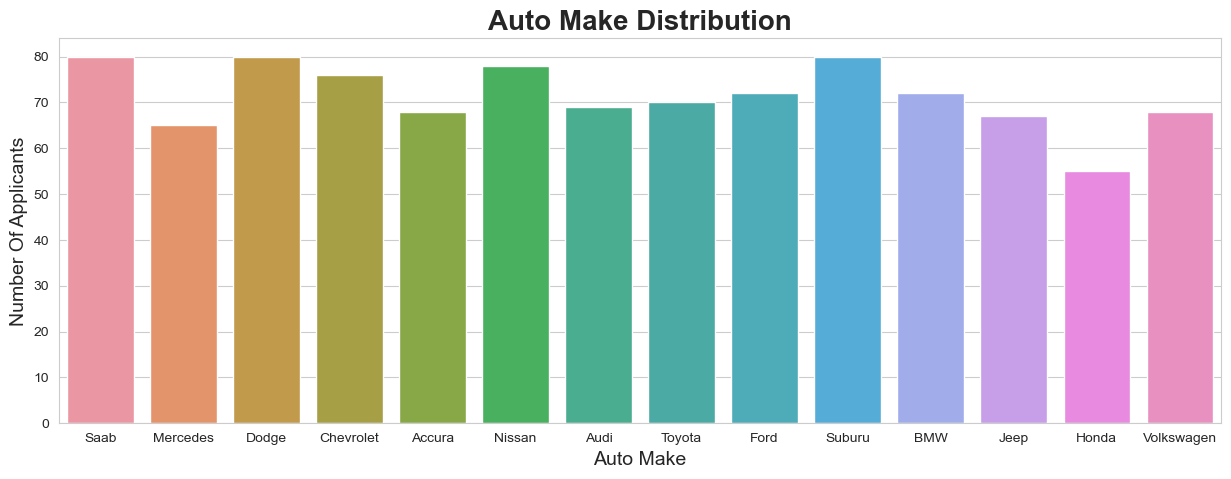

In [27]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
ax = sns.countplot(data=df, x='auto_make')
plt.title('Auto Make Distribution', fontdict={'fontweight':'bold', 'fontsize':20})
plt.ylabel("Number Of Applicants", fontsize=14)
plt.xlabel('Auto Make', fontsize=14)

plt.show()

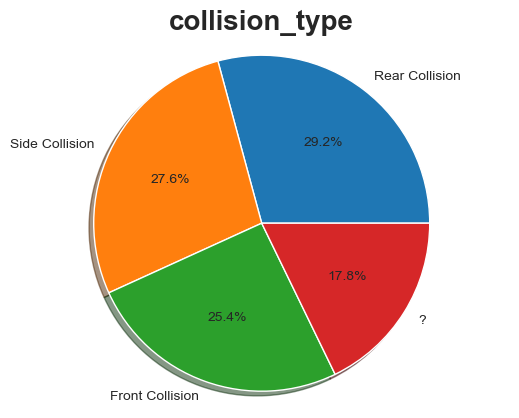

In [28]:
x=df['collision_type'].value_counts()
plt.pie(x,labels=x.index,shadow=True,autopct='%1.1f%%')
plt.title('collision_type',fontdict={'fontweight':'bold','fontsize':20})
plt.axis('equal')
plt.show()

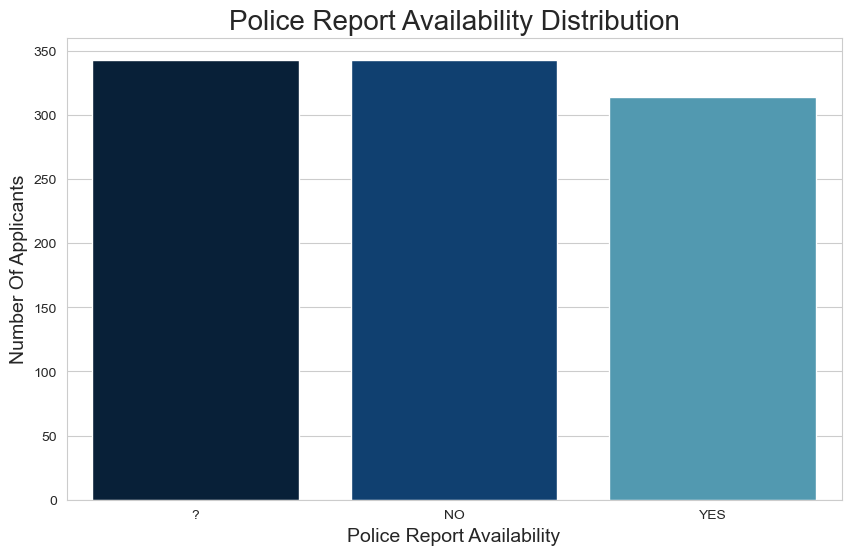

In [30]:
df['police_report_available'] = df['police_report_available'].astype('category')

sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='police_report_available', palette='ocean')
plt.title('Police Report Availability Distribution', fontdict={'fontweight':'normal', 'fontsize':20})
plt.ylabel("Number Of Applicants", fontsize=14)
plt.xlabel('Police Report Availability', fontsize=14)

plt.show()

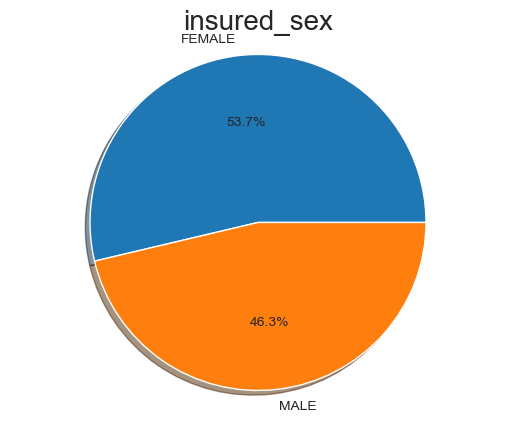

In [31]:
x=df['insured_sex'].value_counts()
plt.pie(x,labels=x.index,shadow=True,autopct='%1.1f%%')
plt.title('insured_sex',fontdict={'fontweight':'normal','fontsize':20})
plt.axis('equal')
plt.show()

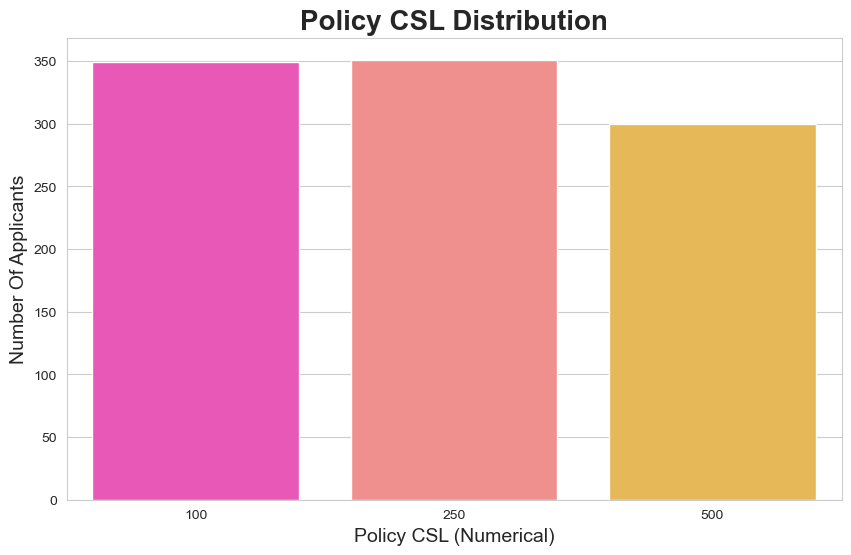

In [33]:
df['policy_csl_numeric'] = df['policy_csl'].str.split('/').str[0].astype(int)

sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='policy_csl_numeric', palette='spring')
plt.title('Policy CSL Distribution', fontdict={'fontweight':'bold', 'fontsize':20})
plt.ylabel("Number Of Applicants", fontsize=14)
plt.xlabel('Policy CSL (Numerical)', fontsize=14)

plt.show()

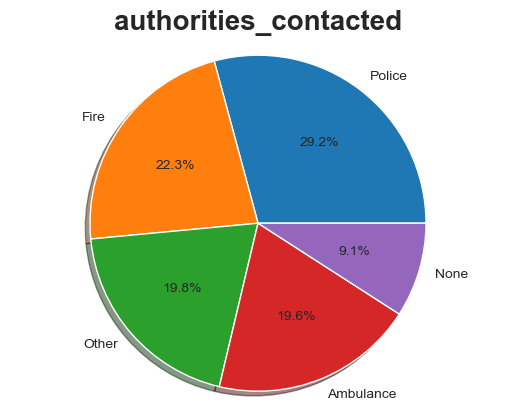

In [34]:
x=df['authorities_contacted'].value_counts()
plt.pie(x,labels=x.index,shadow=True,autopct='%1.1f%%')
plt.title('authorities_contacted',fontdict={'fontweight':'bold','fontsize':20})
plt.axis('equal')
plt.show()

This shows that 9.10% of individuals did not contact any authority after the incident, and the majority contacted the police.

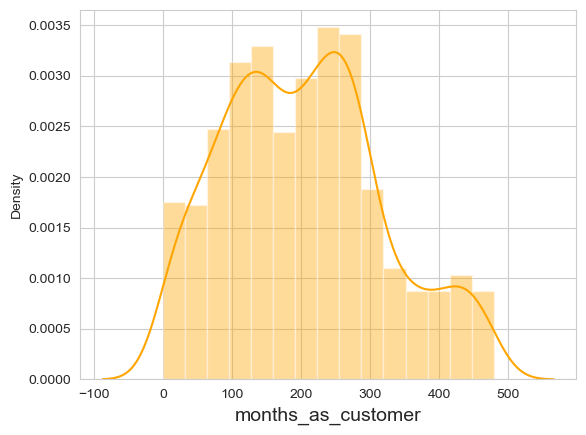

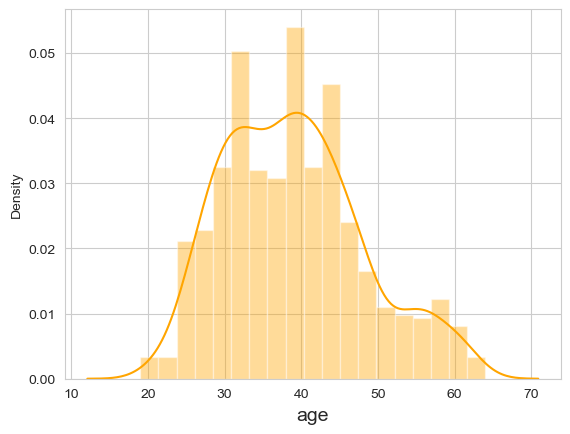

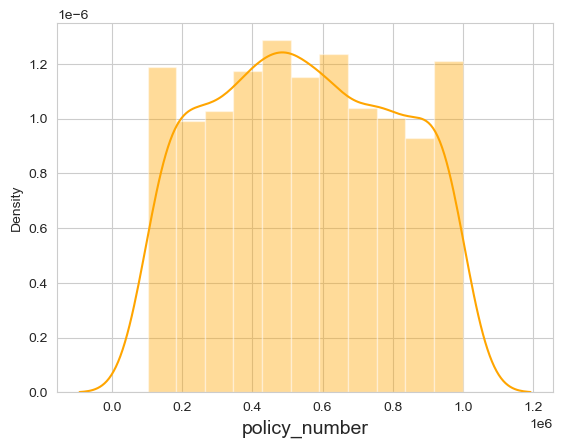

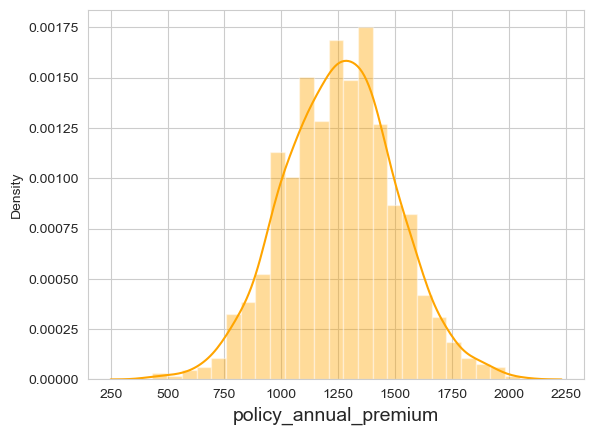

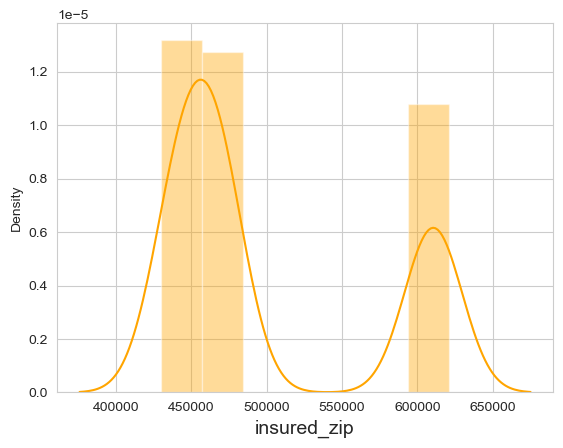

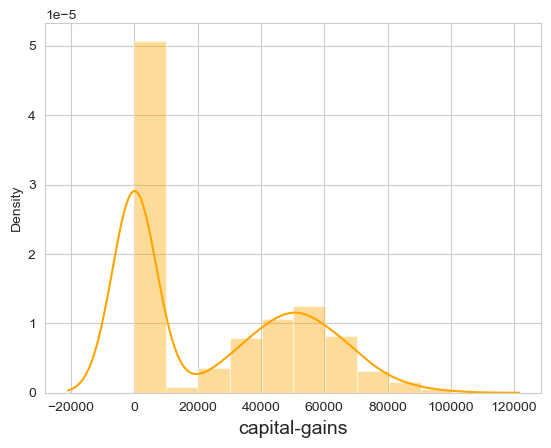

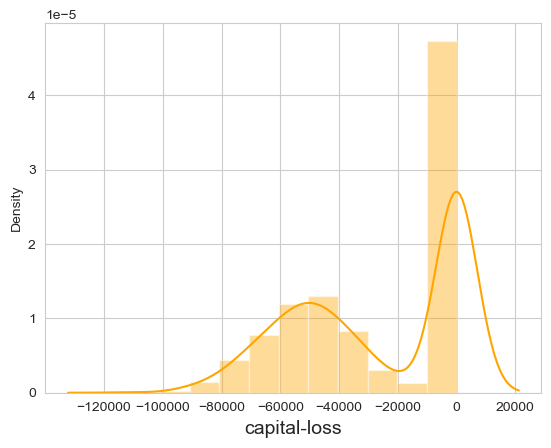

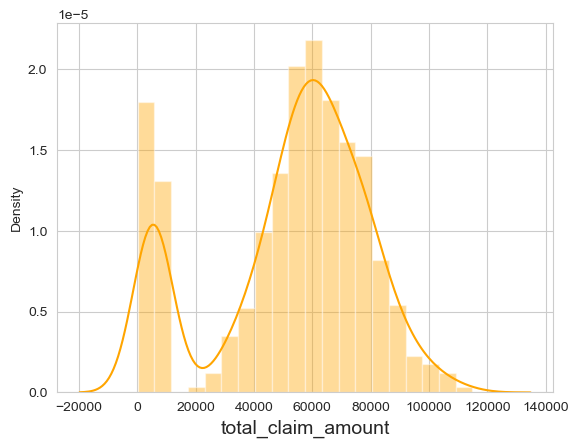

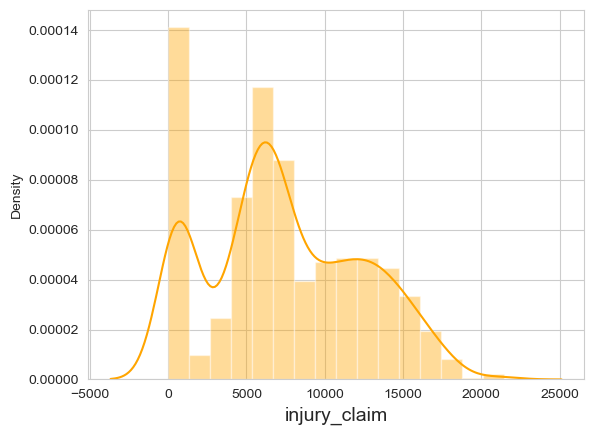

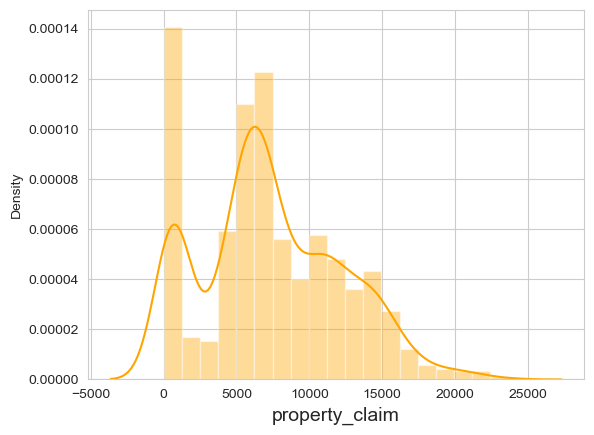

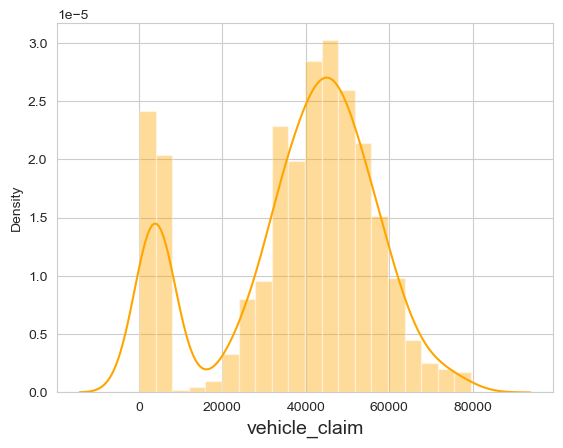

In [35]:
for i in continues_features:
    plt.figure()
    sns.distplot(df[i],color='orange')
    plt.xlabel(i,fontsize=14)

#### Univariate Analysis

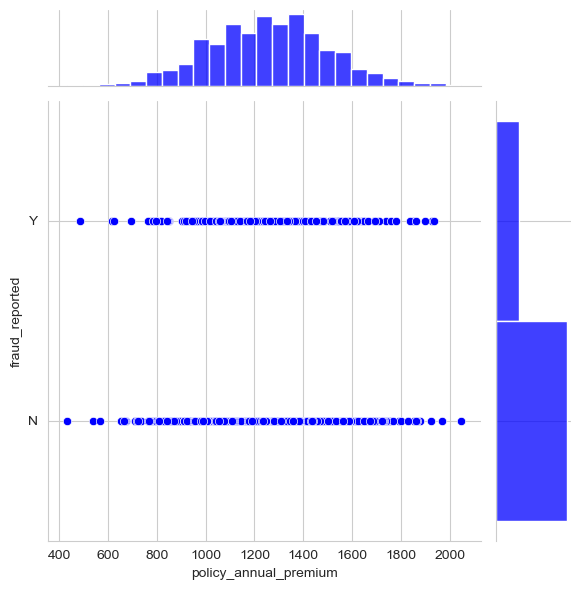

In [36]:
sns.jointplot(x=df['policy_annual_premium'],y=df['fraud_reported'],color='blue')

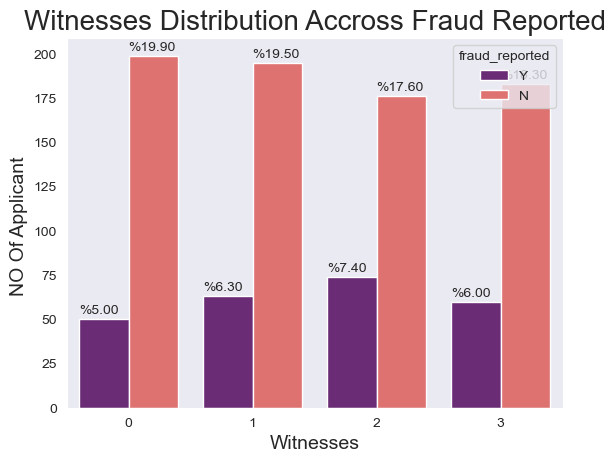

In [37]:
sns.set_style('dark')
ax=sns.countplot(x=df['witnesses'],hue=df['fraud_reported'],palette='magma')
plt.title('Witnesses Distribution Accross Fraud Reported',fontdict={'fontweight':'normal','fontsize':20})
plt.ylabel("NO Of Applicant ",fontsize=14)
plt.xlabel('Witnesses',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x(),p.get_height()+3))

Those with zero witnesses have less fraud, while those with 2 or 3 witnesses have more fraud.

Text(0.5, 0, 'Incident_city')

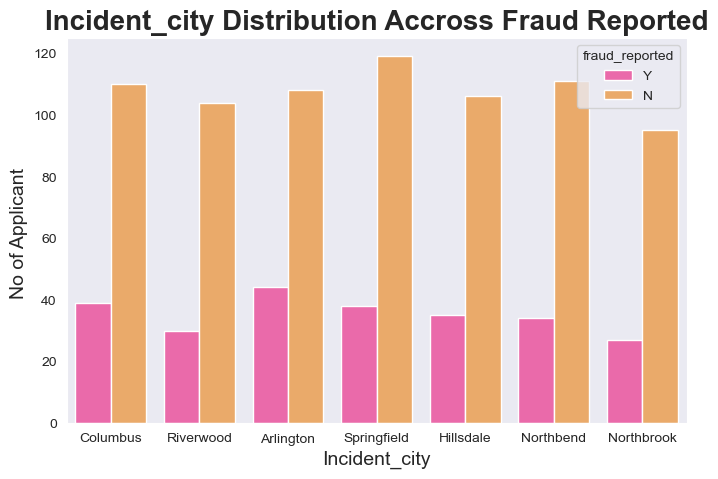

In [38]:
plt.figure(figsize=(8,5))
ax=sns.set_style('dark')
ax=sns.countplot(x=df['incident_city'],hue=df['fraud_reported'],palette='spring')
plt.title('Incident_city Distribution Accross Fraud Reported',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("No of Applicant ",fontsize=14)
plt.xlabel('Incident_city',fontsize=14)

fraud_reported   N   Y
auto_model            
3 Series        17   1
92x             20   8
93              20   5
95              22   5
A3              27  10
A5              21  11
Accord          10   3
C300            11   7
CRV             17   3
Camry           24   4
Civic           14   8
Corolla         17   3
E400            20   7
Escape          18   6
F150            17  10
Forrestor       20   8
Fusion          15   6
Grand Cherokee  19   6
Highlander      16   6
Impreza         14   6
Jetta           25  10
Legacy          27   5
M5              10   5
MDX             28   8
ML350           12   8
Malibu          27   3
Maxima          17   7
Neon            31   6
Passat          24   9
Pathfinder      27   4
RAM             29  14
RSX             11   1
Silverado       13   9
TL              16   4
Tahoe           15   9
Ultima          20   3
Wrangler        37   5
X5              16   7
X6               9   7


Text(0.5, 0, 'No Of Applicant')

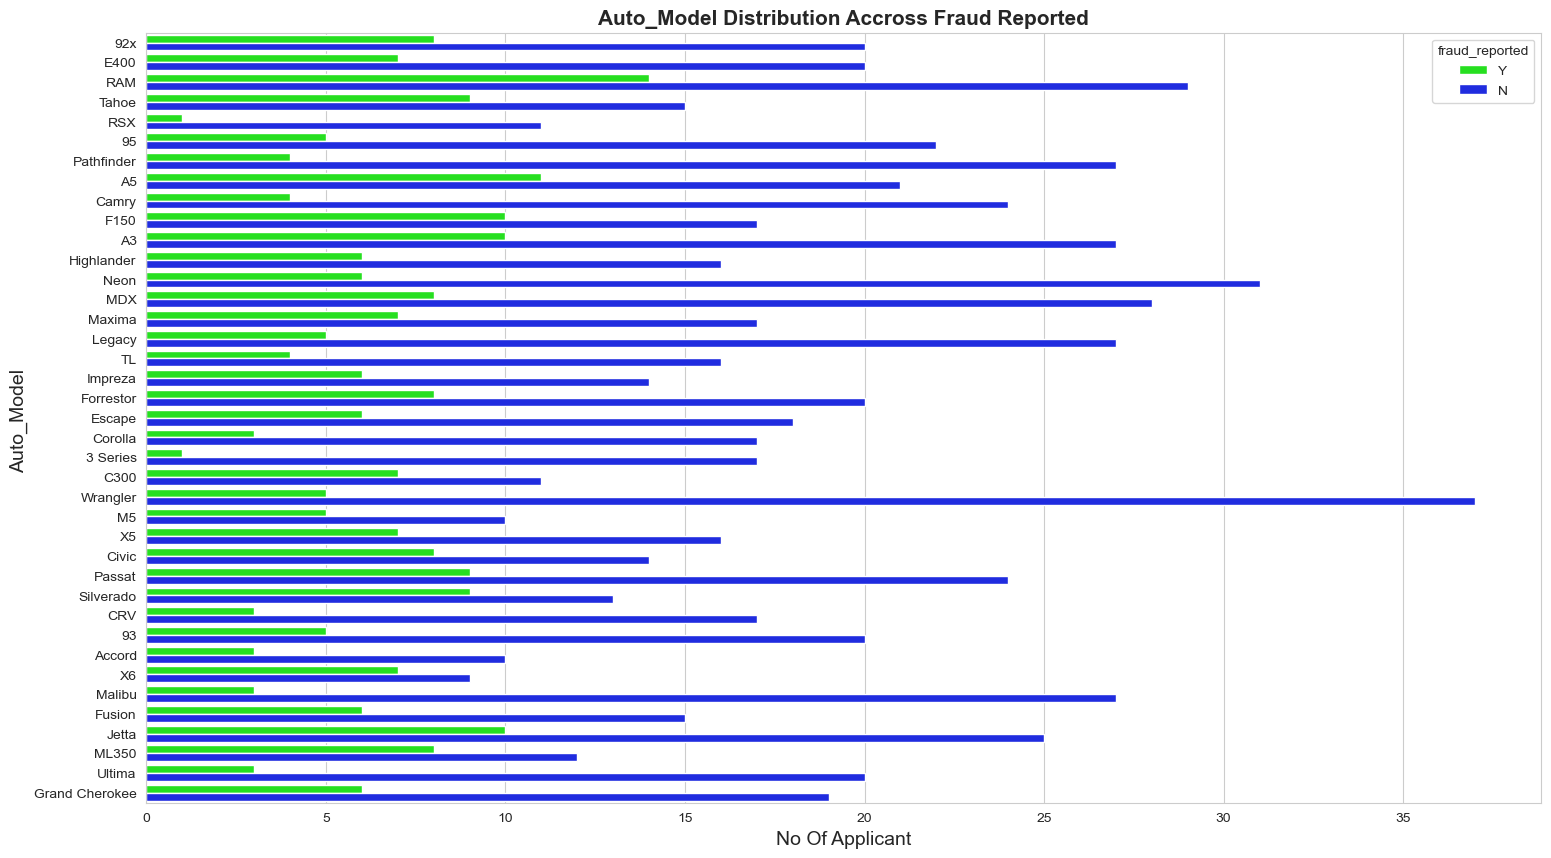

In [39]:
print(pd.crosstab(df['auto_model'],df['fraud_reported']))
plt.figure(figsize=(18,10))
ax=sns.set_style('whitegrid')
ax=sns.countplot(y=df['auto_model'],hue=df['fraud_reported'],palette='hsv')
plt.title('Auto_Model Distribution Accross Fraud Reported',fontdict={'fontweight':'bold','fontsize':15})
plt.ylabel("Auto_Model ",fontsize=14)
plt.xlabel('No Of Applicant',fontsize=14)

Most of the Accident show in RAM,Neon,Jeeta.

The AM model has more fraudulent claims, while the RSX model has fewer fraudulent claims.

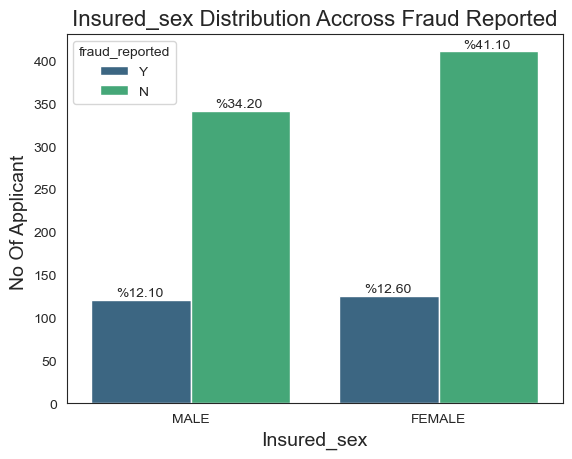

In [40]:
ax=sns.set_style('white')
ax=sns.countplot(x=df['insured_sex'],hue=df['fraud_reported'],palette='viridis')
plt.title('Insured_sex Distribution Accross Fraud Reported',fontdict={'fontweight':'normal','fontsize':16})
plt.ylabel("No Of Applicant ",fontsize=14)
plt.xlabel('Insured_sex',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x()+0.1, p.get_height()+4))

Text(0.5, 0, 'policy_csl')

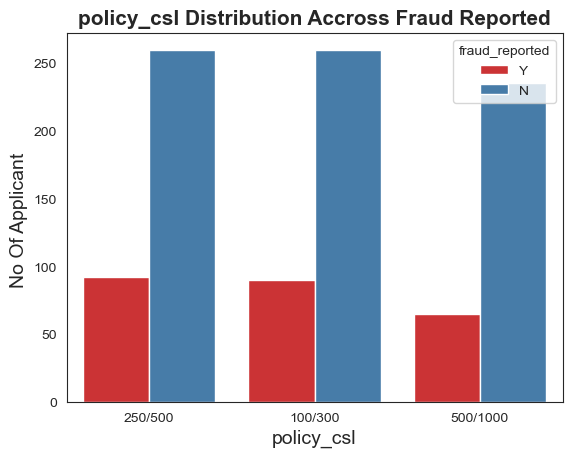

In [41]:
sns.set_style('white')
ax=sns.countplot(x=df['policy_csl'],hue=df['fraud_reported'],palette='Set1')
plt.title('policy_csl Distribution Accross Fraud Reported',fontdict={'fontweight':'bold','fontsize':15})
plt.ylabel("No Of Applicant ",fontsize=14)
plt.xlabel('policy_csl',fontsize=14)

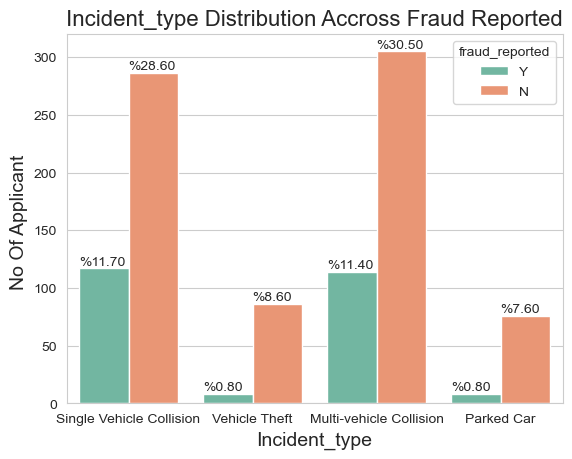

In [42]:
sns.set_style('whitegrid')
ax=sns.countplot(x=df['incident_type'],hue=df['fraud_reported'],palette='Set2')
plt.title('Incident_type Distribution Accross Fraud Reported',fontdict={'fontweight':'normal','fontsize':16})
plt.ylabel("No Of Applicant ",fontsize=14)
plt.xlabel('Incident_type',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x(), p.get_height()+3))

fraud_reported       N   Y
insured_occupation        
adm-clerical        54  11
armed-forces        52  17
craft-repair        52  22
exec-managerial     48  28
farming-fishing     37  16
handlers-cleaners   43  11
machine-op-inspct   71  22
other-service       59  12
priv-house-serv     59  12
prof-specialty      67  18
protective-serv     49  14
sales               55  21
tech-support        56  22
transport-moving    51  21


Text(0.5, 0, 'Insured_education_level')

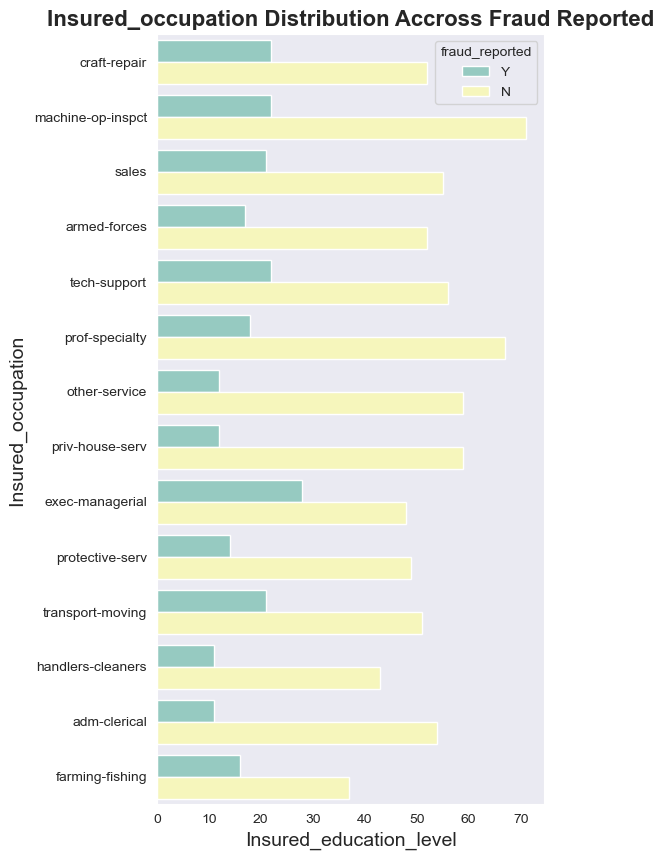

In [43]:
print(pd.crosstab(df['insured_occupation'],df['fraud_reported']))

plt.figure(figsize=(5,10))
sns.set_style('dark')
ax=sns.countplot(y=df['insured_occupation'],hue=df['fraud_reported'],palette='Set3')
plt.title('Insured_occupation Distribution Accross Fraud Reported',fontdict={'fontweight':'bold','fontsize':16})
plt.ylabel("Insured_occupation ",fontsize=14)
plt.xlabel('Insured_education_level',fontsize=14)

This chart indicates that individuals in ex-managerial positions have a higher tendency for fraud, while handlers-cleaners have a lower tendency for fraud. This observation is quite shocking, as it suggests that individuals with higher education and those in higher positions are more likely to commit fraud, while those with less education have a lower tendency to do so.

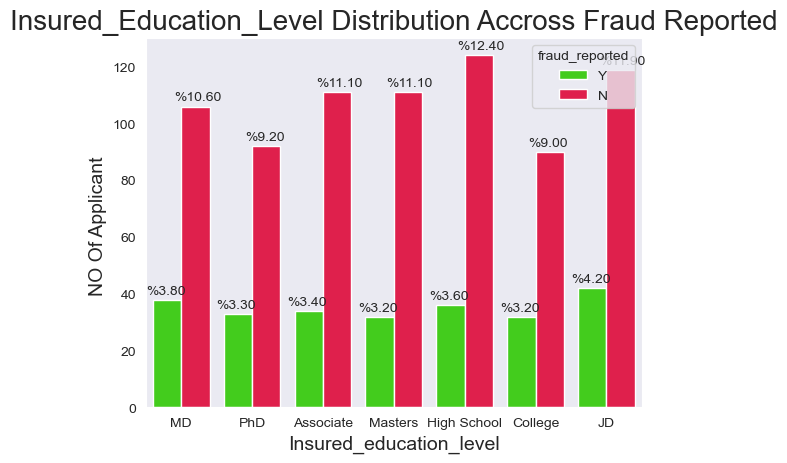

In [44]:
sns.set_style('dark')
ax=sns.countplot(x=df['insured_education_level'],hue=df['fraud_reported'],palette='prism')
plt.title('Insured_Education_Level Distribution Accross Fraud Reported',fontdict={'fontweight':'normal','fontsize':20})
plt.ylabel("NO Of Applicant ",fontsize=14)
plt.xlabel('Insured_education_level',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x()-0.1, p.get_height()+2))

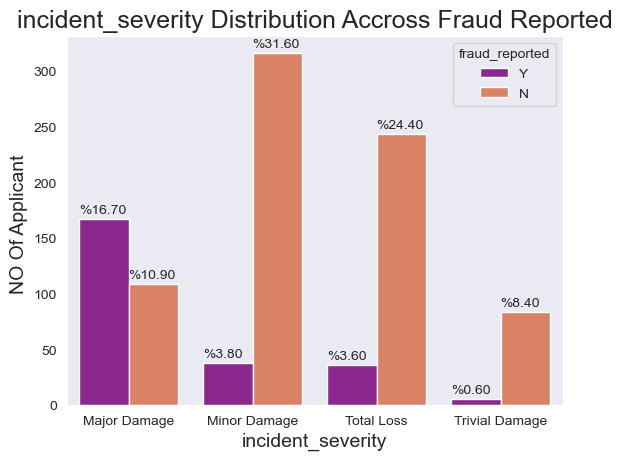

In [45]:
sns.set_style('dark')
ax=sns.countplot(x=df['incident_severity'],hue=df['fraud_reported'],palette='plasma')
plt.title('incident_severity Distribution Accross Fraud Reported',fontdict={'fontweight':'normal','fontsize':18})
plt.ylabel("NO Of Applicant ",fontsize=14)
plt.xlabel('incident_severity',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x(), p.get_height()+5))

From this chart, we observe that major damage severity is associated with more instances of fraud. Therefore, it would be wise to investigate across claim amounts as well. It's possible that those who claim higher amounts may also be involved in fraud.

Text(0.5, 0, 'fraud_reported')

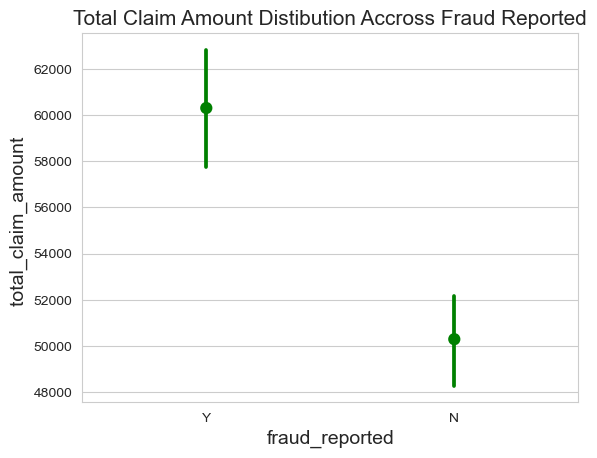

In [47]:
sns.set_style('whitegrid')
sns.pointplot(y=df['total_claim_amount'],x=df['fraud_reported'],join=False,color='green')
plt.title('Total Claim Amount Distibution Accross Fraud Reported',fontdict={'fontweight':'normal','fontsize':15})
plt.ylabel("total_claim_amount ",fontsize=14)
plt.xlabel('fraud_reported',fontsize=14)

Text(0.5, 0, 'fraud_reported')

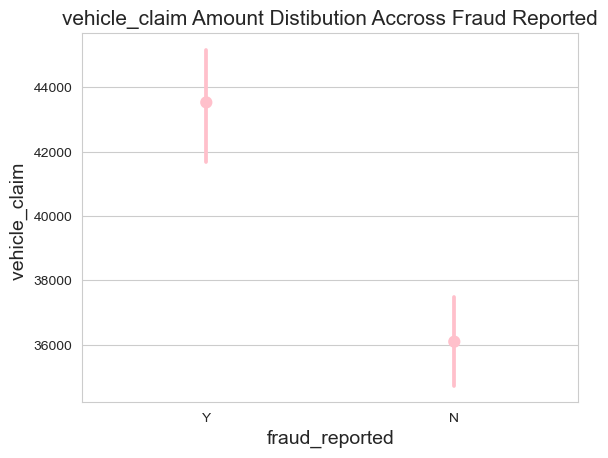

In [48]:
sns.set_style('whitegrid')
sns.pointplot(y=df['vehicle_claim'],x=df['fraud_reported'],join=False,color='pink')
plt.title('vehicle_claim Amount Distibution Accross Fraud Reported',fontdict={'fontweight':'normal','fontsize':15})
plt.ylabel("vehicle_claim ",fontsize=14)
plt.xlabel('fraud_reported',fontsize=14)

Text(0.5, 0, 'fraud_reported')

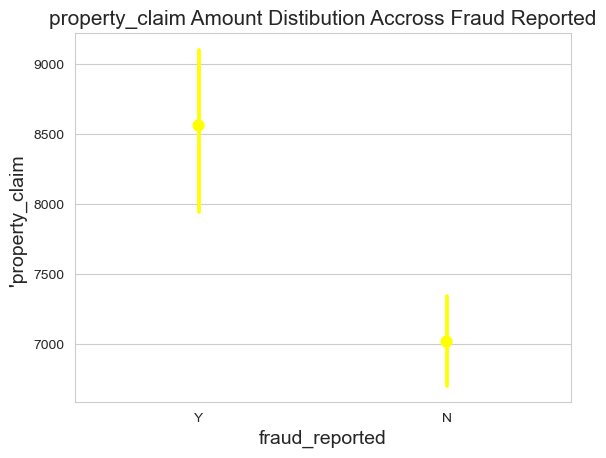

In [49]:
sns.set_style('whitegrid')
sns.pointplot(y=df['property_claim'],x=df['fraud_reported'],join=False,color='yellow')
plt.title('property_claim Amount Distibution Accross Fraud Reported',fontdict={'fontweight':'normal','fontsize':15})
plt.ylabel("'property_claim ",fontsize=14)
plt.xlabel('fraud_reported',fontsize=14)

Text(0.5, 0, 'fraud_reported')

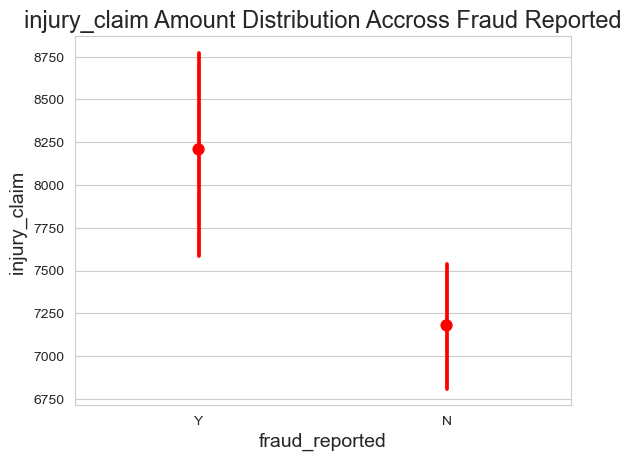

In [50]:
sns.set_style('whitegrid')
sns.pointplot(y=df['injury_claim'],x=df['fraud_reported'],join=False,color='red')
plt.title('injury_claim Amount Distribution Accross Fraud Reported',fontdict={'fontweight':'normal','fontsize':17})
plt.ylabel("injury_claim ",fontsize=14)
plt.xlabel('fraud_reported',fontsize=14)

### Data Preprocessing

In [51]:
df['collision_type']=df['collision_type'].replace('?',np.nan)
df['police_report_available']=df['police_report_available'].replace('?',np.nan)
df['property_damage']=df['property_damage'].replace('?',np.nan)

In [52]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [53]:
nan=['police_report_available','property_damage','collision_type']

In [54]:
for i in nan:
    df[i].fillna(df[i].mode()[0],inplace=True)

### Label Encoding

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
lb=LabelEncoder()

In [57]:
for i in categorical_features:
    df[i]=lb.fit_transform(df[i])

In [58]:
df

months_as_customer  age  policy_number  policy_bind_date  policy_state  \
0                   328   48         521585               532             2   
1                   228   42         342868               821             1   
2                   134   29         687698               186             2   
3                   256   41         227811               766             0   
4                   228   44         367455               181             0   
5                   256   39         104594               385             2   
6                   137   34         413978               112             1   
7                   165   37         429027                60             0   
8                    27   33         485665               132             0   
9                   212   42         636550               772             0   
10                  235   42         543610               795             2   
11                  447   61         214618               891             2   
12                   60   23         842643               634             2   
13                  121   34         626808               806             2   
14                  180   38         644081               875             2   
15                  473   58         892874               601             1   
16                   70   26         558938               251             2   
17                  140   31         275265               470             1   
18                  160   37         921202               879             2   
19                  196   39         143972                44             1   
20                  460   62         183430               769             1   
21                  217   41         431876               834             0   
22                  370   55         285496               816             0   
23                  413   55         115399               237             1   
24                  237   40         736882                33             1   
25                    8   35         699044               163             2   
26                  257   43         863236               629             1   
27                  202   34         608513               559             1   
28                  224   40         914088               236             2   
29                  241   45         596785               106             0   
30                   64   25         908616               544             0   
31                  166   37         666333               591             0   
32                  155   35         336614                20             0   
33                  114   30         584859               107             0   
34                  149   37         990493               391             0   
35                  147   33         129872               256             2   
36                   62   28         200152               268             0   
37                  289   49         933293                61             0   
38                  431   54         485664               781             1   
39                  199   37         982871               823             1   
40                   79   26         206213               246             0   
41                  116   34         616337               931             1   
42                   37   23         448961               920             0   
43                  106   30         790442               397             2   
44                  269   44         108844               161             0   
45                  265   40         430029               663             0   
46                  163   33         529112               233             1   
47                  355   47         939631               547             2   
48                  175   34         866931               199             1   
49                  192   35         582011            

In [59]:
df.describe()

months_as_customer          age  policy_number  policy_bind_date  \
count         1000.000000  1000.000000    1000.000000       1000.000000   
mean           203.954000    38.948000  546238.648000        474.332000   
std            115.113174     9.140287  257063.005276        275.402851   
min              0.000000    19.000000  100804.000000          0.000000   
25%            115.750000    32.000000  335980.250000        233.750000   
50%            199.500000    38.000000  533135.000000        472.500000   
75%            276.250000    44.000000  759099.750000        713.250000   
max            479.000000    64.000000  999435.000000        950.000000   

       policy_state   policy_csl  policy_deductable  policy_annual_premium  \
count    1000.00000  1000.000000        1000.000000            1000.000000   
mean        1.01400     0.951000        1136.000000            1256.406150   
std         0.83096     0.804516         611.864673             244.167395   
min         0.00000     0.000000         500.000000             433.330000   
25%         0.00000     0.000000         500.000000            1089.607500   
50%         1.00000     1.000000        1000.000000            1257.200000   
75%         2.00000     2.000000        2000.000000            1415.695000   
max         2.00000     2.000000        2000.000000            2047.590000   

       umbrella_limit    insured_zip  ...  injury_claim  property_claim  \
count    1.000000e+03    1000.000000  ...   1000.000000     1000.000000   
mean     1.101000e+06  501214.488000  ...   7433.420000     7399.570000   
std      2.297407e+06   71701.610941  ...   4880.951853     4824.726179   
min     -1.000000e+06  430104.000000  ...      0.000000        0.000000   
25%      0.000000e+00  448404.500000  ...   4295.000000     4445.000000   
50%      0.000000e+00  466445.500000  ...   6775.000000     6750.000000   
75%      0.000000e+00  603251.000000  ...  11305.000000    10885.000000   
max      1.000000e+07  620962.000000  ...  21450.000000    23670.000000   

       vehicle_claim    auto_make   auto_model    auto_year  fraud_reported  \
count    1000.000000  1000.000000  1000.000000  1000.000000     1000.000000   
mean    37928.950000     6.546000    19.318000  2005.103000        0.247000   
std     18886.252893     4.034869    11.136107     6.015861        0.431483   
min        70.000000     0.000000     0.000000  1995.000000        0.000000   
25%     30292.500000     3.000000    10.000000  2000.000000        0.000000   
50%     42100.000000     7.000000    20.000000  2005.000000        0.000000   
75%     50822.500000    10.000000    29.000000  2010.000000        0.000000   
max     79560.000000    13.000000    38.000000  2015.000000        1.000000   

       _c39   Profit/Loss  policy_csl_numeric  
count   0.0   1000.000000         1000.000000  
mean    NaN -31396.110803          272.650000  
std     NaN  28609.096730          161.603196  
min     NaN -98696.934167          100.000000  
25%     NaN -52518.001667          100.000000  
50%     NaN -35353.536250          250.000000  
75%     NaN -14471.937292          500.000000  
max     NaN  48515.443333          500.000000  

[8 rows x 42 columns]

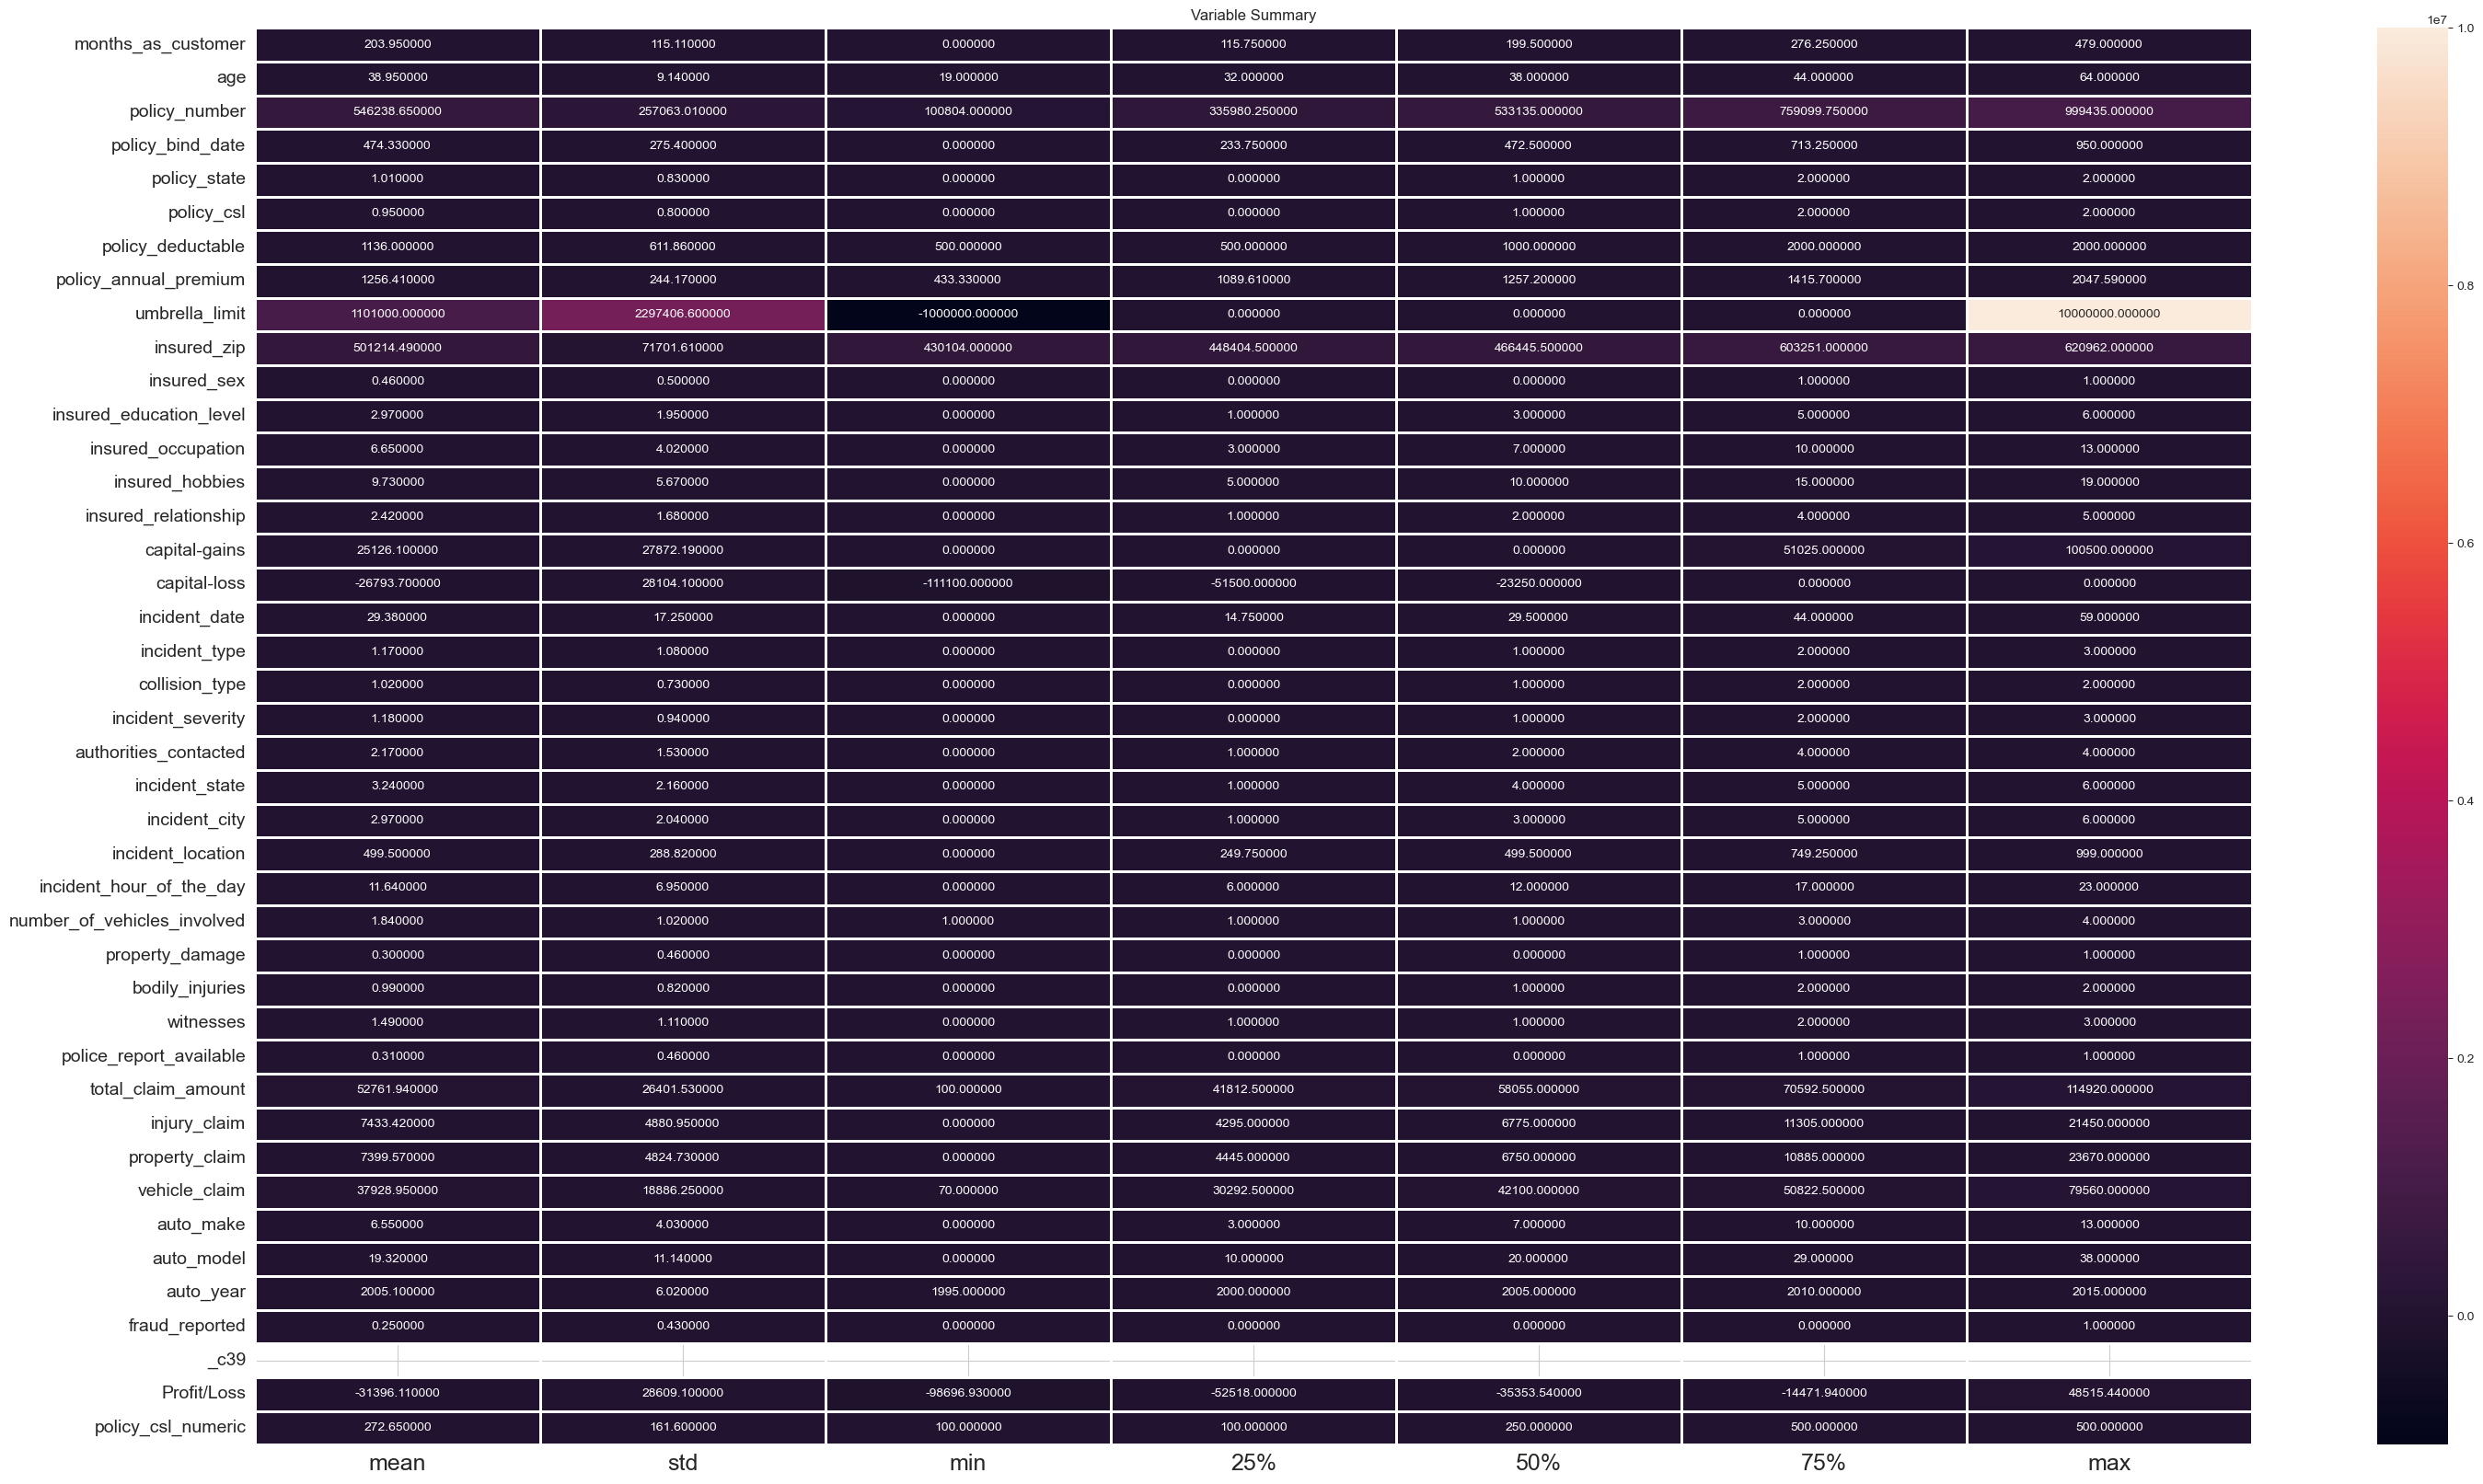

In [60]:
plt.figure(figsize=(35,20))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.title("Variable Summary")
plt.show()

In [61]:
corr=df.corr()
corr

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922098       0.057555   
age                                    0.922098  1.000000       0.059413   
policy_number                          0.057555  0.059413       1.000000   
policy_bind_date                       0.055055  0.056538       0.045713   
policy_state                          -0.000328 -0.014533       0.072815   
policy_csl                            -0.026819 -0.015185       0.038917   
policy_deductable                      0.026807  0.029188      -0.006738   
policy_annual_premium                  0.005018  0.014404       0.022566   
umbrella_limit                         0.015498  0.018126       0.008968   
insured_zip                            0.017895  0.025604       0.007083   
insured_sex                            0.060925  0.073337       0.004564   
insured_education_level               -0.000833  0.000969      -0.037264   
insured_occupation                     0.009814  0.017220      -0.014422   
insured_hobbies                       -0.093661 -0.081315       0.039896   
insured_relationship                   0.069727  0.074832       0.017120   
capital-gains                          0.006399 -0.007075       0.009802   
capital-loss                           0.020209  0.007368      -0.005669   
incident_date                         -0.002985  0.002416       0.053022   
incident_type                         -0.017377 -0.025626       0.001742   
collision_type                        -0.072787 -0.075642      -0.003338   
incident_severity                     -0.059581 -0.058439      -0.015719   
authorities_contacted                  0.010021  0.015417       0.018565   
incident_state                         0.005369  0.005770      -0.010064   
incident_city                         -0.000130 -0.002291      -0.035406   
incident_location                     -0.013630 -0.011101       0.016393   
incident_hour_of_the_day               0.070639  0.087161       0.000113   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
property_damage                        0.005488 -0.003408      -0.019923   
bodily_injuries                       -0.010162 -0.015679      -0.004558   
witnesses                              0.058383  0.052359      -0.012661   
police_report_available               -0.022146 -0.020441       0.031190   
total_claim_amount                     0.062108  0.069863      -0.018009   
injury_claim                           0.065329  0.075522      -0.008762   
property_claim                         0.034940  0.060898      -0.010678   
vehicle_claim                          0.061013  0.062588      -0.020184   
auto_make                              0.047655  0.030410       0.023860   
auto_model                             0.004202  0.017343       0.065240   
auto_year                             -0.000292  0.001354      -0.000183   
fraud_reported                         0.020544  0.012143      -0.029443   
_c39                                        NaN       NaN            NaN   
Profit/Loss                            0.360821  0.321474       0.043803   
policy_csl_numeric                    -0.025953 -0.015500       0.027943   

                             policy_bind_date  policy_state  policy_csl  \
months_as_customer                   0.055055     -0.000328   -0.026819   
age                                  0.056538     -0.014533   -0.015185   
policy_number                        0.045713      0.072815    0.038917   
policy_bind_date                     1.000000      0.015289    0.008486   
policy_state                         0.015289      1.000000    0.001027   
policy_csl                           0.008486      0.001027    1.000000   
policy_deductable                   -0.001721      0.010033    0.003384   
policy_annual_premium               -0.037733      0.012455    0.023978   
umbrella_limit                      -0.024866     -0.029580    0.021636   
insured_zi

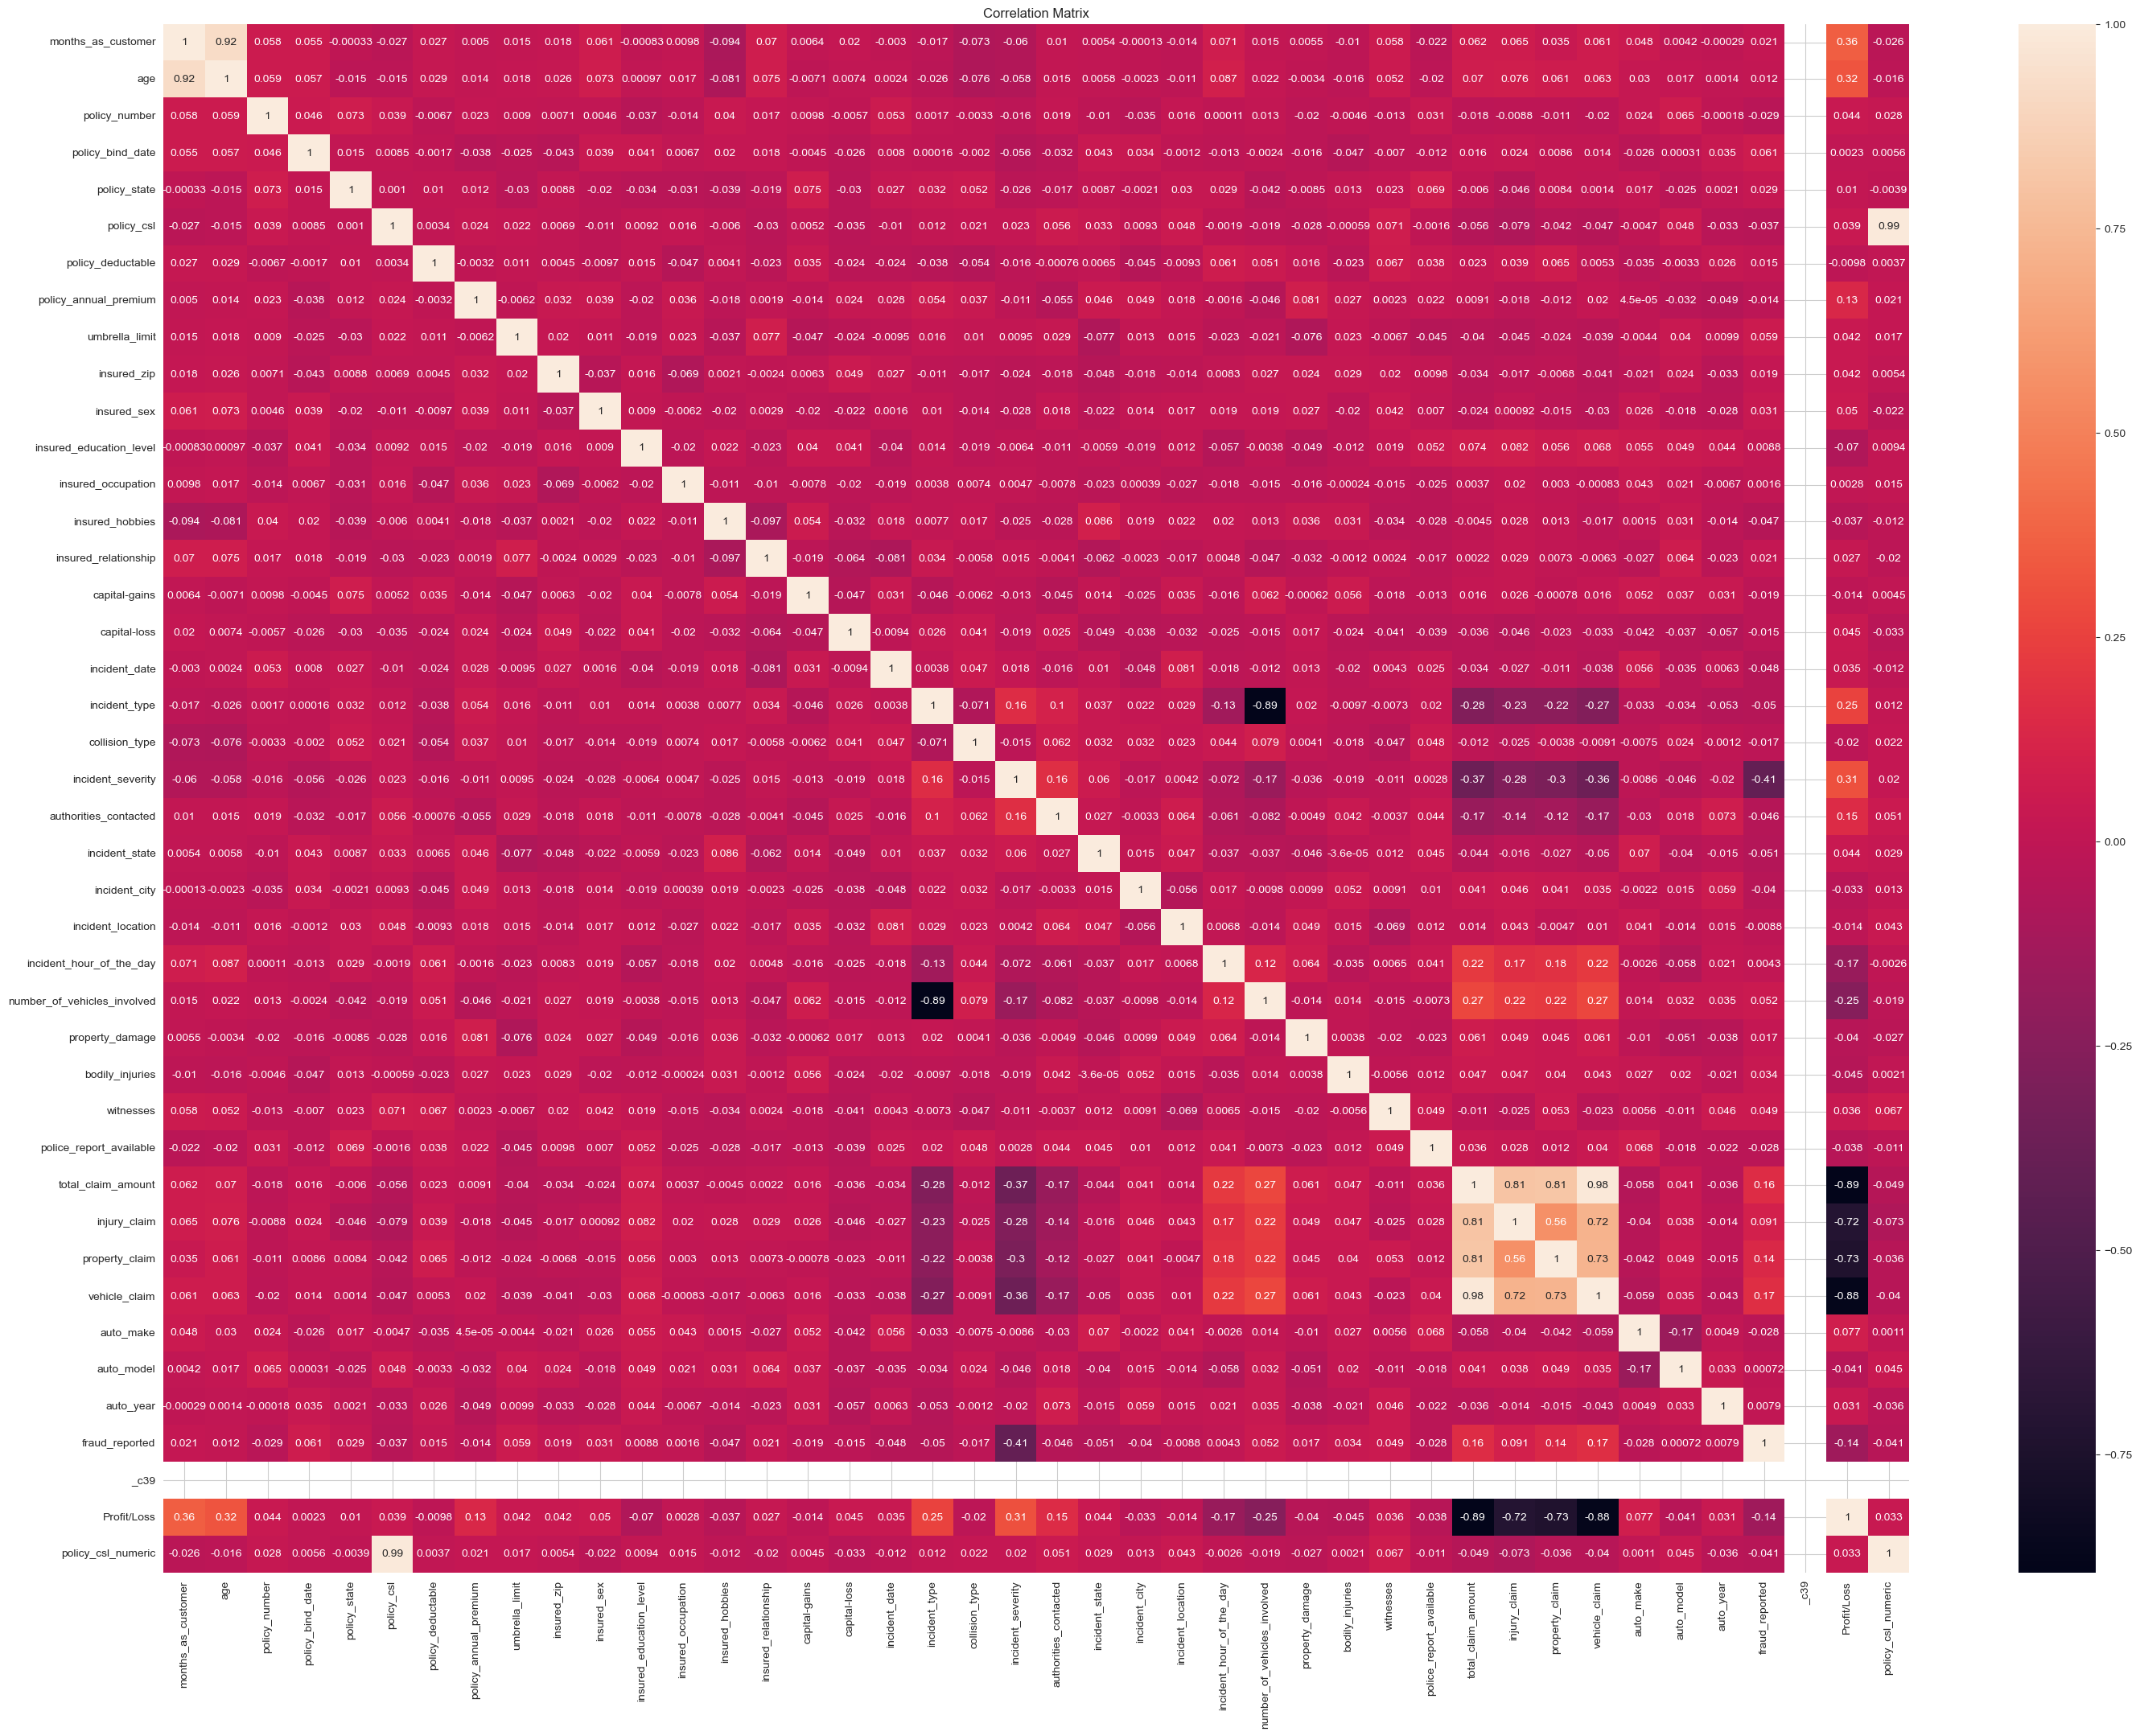

In [62]:
plt.figure(figsize=(35,25))
sns.heatmap(corr,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [63]:
df = df.drop(columns=['_c39']) #removing unnecessary columns

In [64]:
df

months_as_customer  age  policy_number  policy_bind_date  policy_state  \
0                   328   48         521585               532             2   
1                   228   42         342868               821             1   
2                   134   29         687698               186             2   
3                   256   41         227811               766             0   
4                   228   44         367455               181             0   
5                   256   39         104594               385             2   
6                   137   34         413978               112             1   
7                   165   37         429027                60             0   
8                    27   33         485665               132             0   
9                   212   42         636550               772             0   
10                  235   42         543610               795             2   
11                  447   61         214618               891             2   
12                   60   23         842643               634             2   
13                  121   34         626808               806             2   
14                  180   38         644081               875             2   
15                  473   58         892874               601             1   
16                   70   26         558938               251             2   
17                  140   31         275265               470             1   
18                  160   37         921202               879             2   
19                  196   39         143972                44             1   
20                  460   62         183430               769             1   
21                  217   41         431876               834             0   
22                  370   55         285496               816             0   
23                  413   55         115399               237             1   
24                  237   40         736882                33             1   
25                    8   35         699044               163             2   
26                  257   43         863236               629             1   
27                  202   34         608513               559             1   
28                  224   40         914088               236             2   
29                  241   45         596785               106             0   
30                   64   25         908616               544             0   
31                  166   37         666333               591             0   
32                  155   35         336614                20             0   
33                  114   30         584859               107             0   
34                  149   37         990493               391             0   
35                  147   33         129872               256             2   
36                   62   28         200152               268             0   
37                  289   49         933293                61             0   
38                  431   54         485664               781             1   
39                  199   37         982871               823             1   
40                   79   26         206213               246             0   
41                  116   34         616337               931             1   
42                   37   23         448961               920             0   
43                  106   30         790442               397             2   
44                  269   44         108844               161             0   
45                  265   40         430029               663             0   
46                  163   33         529112               233             1   
47                  355   47         939631               547             2   
48                  175   34         866931               199             1   
49                  192   35         582011            

#### Data Cleaning

In [65]:
df.drop(['Profit/Loss','incident_hour_of_the_day','number_of_vehicles_involved','policy_number','policy_bind_date','incident_date','incident_location','insured_zip'],axis=1)

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                   328   48             2           1               1000   
1                   228   42             1           1               2000   
2                   134   29             2           0               2000   
3                   256   41             0           1               2000   
4                   228   44             0           2               1000   
5                   256   39             2           1               1000   
6                   137   34             1           1               1000   
7                   165   37             0           0               1000   
8                    27   33             0           0                500   
9                   212   42             0           0                500   
10                  235   42             2           0                500   
11                  447   61             2           0               2000   
12                   60   23             2           2                500   
13                  121   34             2           0               1000   
14                  180   38             2           1               2000   
15                  473   58             1           0               2000   
16                   70   26             2           2               1000   
17                  140   31             1           2                500   
18                  160   37             2           2                500   
19                  196   39             1           2               2000   
20                  460   62             1           1               1000   
21                  217   41             0           2               2000   
22                  370   55             0           0               2000   
23                  413   55             1           0               2000   
24                  237   40             1           0               1000   
25                    8   35             2           0               2000   
26                  257   43             1           0               2000   
27                  202   34             1           0                500   
28                  224   40             2           0               2000   
29                  241   45             0           2               2000   
30                   64   25             0           1               1000   
31                  166   37             0           0               2000   
32                  155   35             0           2               1000   
33                  114   30             0           0               1000   
34                  149   37             0           2                500   
35                  147   33             2           0               1000   
36                   62   28             0           0               1000   
37                  289   49             0           2               2000   
38                  431   54             1           2               2000   
39                  199   37             1           1                500   
40                   79   26             0           0                500   
41                  116   34             1           1                500   
42                   37   23             0           2                500   
43                  106   30             2           1                500   
44                  269   44             0           0               2000   
45                  265   40             0           1               1000   
46                  163   33             1           0                500   
47                  355   47             2           2               2000   
48                  175   34             1           2               1000   
49                  192   35             0           0               1000   
50                  430   59             2           1               2000   
5

In [66]:
df.columns 

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'Profit/Loss',
       'policy_csl_numeric'],
      dtype='object')

In [67]:
df = df.drop(columns=['policy_csl_numeric'])

In [69]:
df.columns 

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'Profit/Loss'],
      dtype='object')

In [70]:
from scipy.stats import zscore

In [71]:
z=np.abs(zscore(df))
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975]), array([ 8,  8,  8,  8,  8,  7,  7,  8,  8,  8,  8, 33,  8,  8,  8,  7, 16,
        8,  8,  8]))


In [73]:
df_new=df[(z<3).all(axis=1)]

In [74]:
df_new.shape   #Checking new shape

(980, 40)

In [75]:
df.shape

(1000, 40)

In [76]:
dataloss=(1000-979)/1000*100    # data loss
dataloss 

2.1

After removing skewness - total data lost is 2.1%

In [77]:
df=df_new
df[continues_features].skew()

months_as_customer       0.362608
age                      0.475385
policy_number            0.036283
policy_annual_premium    0.035964
insured_zip              0.837283
capital-gains            0.466619
capital-loss            -0.376884
total_claim_amount      -0.593593
injury_claim             0.271759
property_claim           0.361356
vehicle_claim           -0.620936
dtype: float64

There is not too much skewness present in the dataset.

In [78]:
x=df.drop(['fraud_reported'],axis=1)
y=df['fraud_reported']

In [79]:
from sklearn.preprocessing import power_transform

x1=power_transform(x,method='yeo-johnson') # removing skewness
x1=pd.DataFrame(x1)

In [80]:
x1.skew()

0    -0.133972
1    -0.002183
2    -0.161791
3    -0.293677
4    -0.150765
5    -0.096814
6     0.022179
7    -0.007258
8    -7.932397
9     0.000000
10    0.139324
11   -0.187642
12   -0.238129
13   -0.248575
14   -0.160168
15    0.031294
16    0.088750
17   -0.264010
18   -0.095572
19   -0.129037
20   -0.079569
21   -0.223816
22   -0.256064
23   -0.181833
24   -0.288690
25   -0.258027
26    0.372833
27    0.853093
28   -0.133824
29   -0.151669
30    0.796221
31   -0.508540
32   -0.416732
33   -0.357397
34   -0.521805
35   -0.229846
36   -0.276099
37   -0.013973
38    0.384035
dtype: float64

In [81]:
x=x1

In [82]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X=std.fit_transform(x)
x=X

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

#### Random State Selection

In [84]:
lg=LogisticRegression()

In [85]:
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lg.fit(x_train,y_train)
    pred_test=lg.predict(x_test)
    pred_train=lg.predict(x_train)
    if round(accuracy_score(y_test,pred_test)*100,1)==round(accuracy_score(y_train,pred_train)*100,1):
        print('Random state',i,'score is well')
        print('test score',accuracy_score(y_test,pred_test)*100)
        print('train score',accuracy_score(y_train,pred_train)*100)

Random state 74 score is well
test score 80.61224489795919
train score 80.61224489795919
Random state 80 score is well
test score 80.10204081632652
train score 80.10204081632652


In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=80)

In [87]:
y_train.shape

(784,)

In [88]:
y_train.value_counts()

0    585
1    199
Name: fraud_reported, dtype: int64

#### SMOTE

In [89]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
trainx,trainy=smt.fit_resample(x_train,y_train)

In [90]:
trainy.value_counts()

1    585
0    585
Name: fraud_reported, dtype: int64

In [91]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [92]:
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gb=GaussianNB()

In [93]:
def fun(f):
    f.fit(trainx,trainy)
    pred=f.predict(x_test)
    print('Accuracy Score',accuracy_score(y_test,pred)*100)
    print('Confusion Matrix\n',confusion_matrix(y_test,pred))
    print('Classification Report\n',classification_report(y_test,pred))
    print('F1 score',f1_score(y_test,pred)*100)

In [94]:
fun(lg)

Accuracy Score 75.0
Confusion Matrix
 [[114  41]
 [  8  33]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.74      0.82       155
           1       0.45      0.80      0.57        41

    accuracy                           0.75       196
   macro avg       0.69      0.77      0.70       196
weighted avg       0.83      0.75      0.77       196

F1 score 57.391304347826086


In [95]:
fun(svc)

Accuracy Score 81.63265306122449
Confusion Matrix
 [[134  21]
 [ 15  26]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       155
           1       0.55      0.63      0.59        41

    accuracy                           0.82       196
   macro avg       0.73      0.75      0.74       196
weighted avg       0.83      0.82      0.82       196

F1 score 59.09090909090909


In [96]:
fun(dtc)

Accuracy Score 72.95918367346938
Confusion Matrix
 [[119  36]
 [ 17  24]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.77      0.82       155
           1       0.40      0.59      0.48        41

    accuracy                           0.73       196
   macro avg       0.64      0.68      0.65       196
weighted avg       0.78      0.73      0.75       196

F1 score 47.524752475247524


In [97]:
fun(knn)

Accuracy Score 45.40816326530612
Confusion Matrix
 [[ 53 102]
 [  5  36]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.34      0.50       155
           1       0.26      0.88      0.40        41

    accuracy                           0.45       196
   macro avg       0.59      0.61      0.45       196
weighted avg       0.78      0.45      0.48       196

F1 score 40.22346368715084


In [98]:
fun(gb)

Accuracy Score 60.204081632653065
Confusion Matrix
 [[86 69]
 [ 9 32]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.55      0.69       155
           1       0.32      0.78      0.45        41

    accuracy                           0.60       196
   macro avg       0.61      0.67      0.57       196
weighted avg       0.78      0.60      0.64       196

F1 score 45.07042253521127


#### Ensemble Method

In [99]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBRFClassifier

In [100]:
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
gd=GradientBoostingClassifier()
xgb=XGBClassifier()
sgd=SGDClassifier()
xgbr=XGBRFClassifier()

In [101]:
fun(rfc)

Accuracy Score 83.16326530612244
Confusion Matrix
 [[136  19]
 [ 14  27]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       155
           1       0.59      0.66      0.62        41

    accuracy                           0.83       196
   macro avg       0.75      0.77      0.76       196
weighted avg       0.84      0.83      0.84       196

F1 score 62.06896551724138


In [102]:
fun(ad)

Accuracy Score 80.10204081632652
Confusion Matrix
 [[133  22]
 [ 17  24]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.86      0.87       155
           1       0.52      0.59      0.55        41

    accuracy                           0.80       196
   macro avg       0.70      0.72      0.71       196
weighted avg       0.81      0.80      0.81       196

F1 score 55.172413793103445


In [103]:
fun(gd)

Accuracy Score 84.18367346938776
Confusion Matrix
 [[133  22]
 [  9  32]]
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.86      0.90       155
           1       0.59      0.78      0.67        41

    accuracy                           0.84       196
   macro avg       0.76      0.82      0.78       196
weighted avg       0.86      0.84      0.85       196

F1 score 67.36842105263158


In [104]:
fun(xgb)

Accuracy Score 83.6734693877551
Confusion Matrix
 [[136  19]
 [ 13  28]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       155
           1       0.60      0.68      0.64        41

    accuracy                           0.84       196
   macro avg       0.75      0.78      0.77       196
weighted avg       0.85      0.84      0.84       196

F1 score 63.63636363636363


In [105]:
fun(sgd)

Accuracy Score 62.755102040816325
Confusion Matrix
 [[93 62]
 [11 30]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.60      0.72       155
           1       0.33      0.73      0.45        41

    accuracy                           0.63       196
   macro avg       0.61      0.67      0.58       196
weighted avg       0.78      0.63      0.66       196

F1 score 45.112781954887225


In [106]:
fun(xgbr)

Accuracy Score 85.20408163265306
Confusion Matrix
 [[133  22]
 [  7  34]]
Classification Report
               precision    recall  f1-score   support

           0       0.95      0.86      0.90       155
           1       0.61      0.83      0.70        41

    accuracy                           0.85       196
   macro avg       0.78      0.84      0.80       196
weighted avg       0.88      0.85      0.86       196

F1 score 70.10309278350515


#### Cross Validation

In [111]:
from sklearn.model_selection import cross_val_score
for i in range(2,16):
    score=cross_val_score(gd,trainx,trainy,cv=i)
    print("score at cv=",i,score.mean()*100)

score at cv= 2 79.91452991452992
score at cv= 3 80.76923076923076
score at cv= 4 85.39494600028053
score at cv= 5 85.47008547008546
score at cv= 6 85.8974358974359
score at cv= 7 87.01627357529837
score at cv= 8 87.70967291026
score at cv= 9 87.09401709401709
score at cv= 10 87.77777777777779
score at cv= 11 87.97310078389252
score at cv= 12 88.05491268672418
score at cv= 13 87.60683760683763
score at cv= 14 88.47942791574462
score at cv= 15 87.77777777777779


#### Hyperparameter Tuning of our best model

In [112]:
from sklearn.model_selection import GridSearchCV 
parameters = {'n_estimators':[200,700],
             'max_features':['auto','sqrt','log2'],
             'max_depth':[4,5,6,7,8],
             'criterion':['gini','entropy']}

In [115]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [116]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [117]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [118]:
mod = RandomForestClassifier(criterion='gini',max_features='sqrt',max_depth=8, n_estimators=700)

mod.fit(x_train,y_train)
pred = mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

79.08163265306123


### AUC ROC CURVE

In [119]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [120]:
#LogisticRegression
roc_auc_score(y_test,lg.predict(x_test))   

0.7701809598741148

In [121]:
#RandonForest
roc_auc_score(y_test,rfc.predict(x_test))   

0.7679779701022817

In [122]:
#DecisionTree
roc_auc_score(y_test,dtc.predict(x_test))   

0.6765538945712037

In [123]:
#KNeighbors
roc_auc_score(y_test,knn.predict(x_test))   

0.6099921321793863

In [124]:
#mod
roc_auc_score(y_test,mod.predict(x_test))   

0.5807238394964594

In [125]:
#KNeighbors
roc_auc_score(y_test,ad.predict(x_test))   

0.7217151848937844

In [126]:
#KNeighbors
roc_auc_score(y_test,gd.predict(x_test))   

0.8192761605035406

In [127]:
#Support Vector Machine
roc_auc_score(y_test,svc.predict(x_test))   

0.7493312352478364

In [128]:
#xgb
roc_auc_score(y_test,xgb.predict(x_test))   

0.7801730920535013

In [129]:
#xgb
roc_auc_score(y_test,sgd.predict(x_test))   

0.6658536585365854

In [130]:
#xgb
roc_auc_score(y_test,xgbr.predict(x_test))   

0.8436664044059794

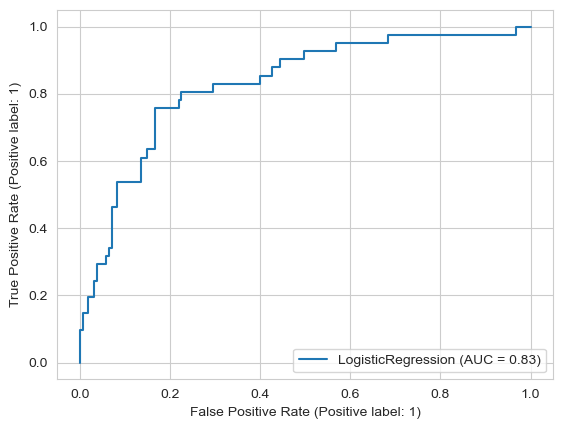

In [132]:
#Lets check ROC AUC Curve for the model

RocCurveDisplay.from_estimator(lg,x_test,y_test)

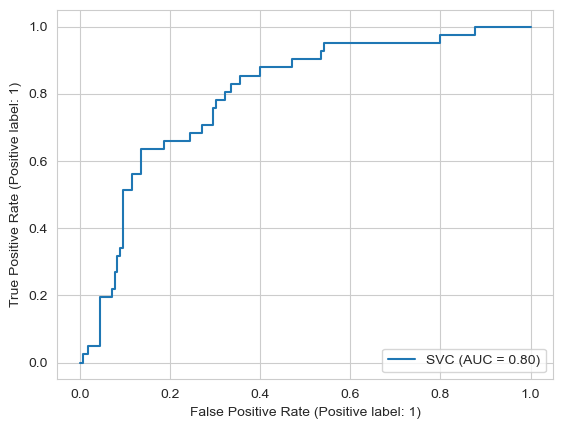

In [133]:
#Lets check ROC AUC Curve for the model

RocCurveDisplay.from_estimator(svc,x_test,y_test)

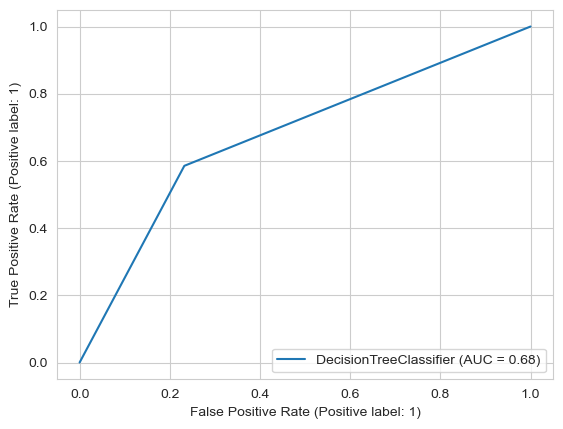

In [134]:
RocCurveDisplay.from_estimator(dtc,x_test,y_test)

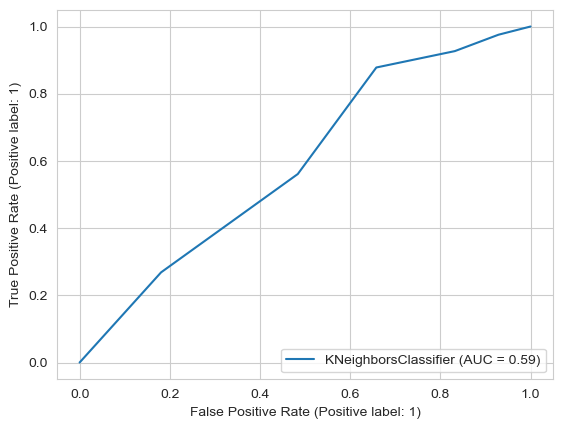

In [135]:
RocCurveDisplay.from_estimator(knn,x_test,y_test)

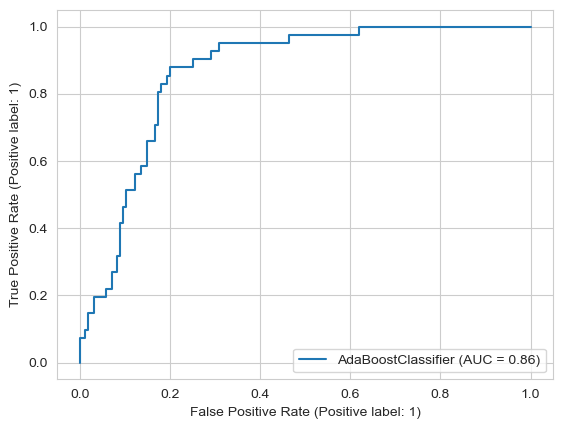

In [136]:
RocCurveDisplay.from_estimator(ad,x_test,y_test)

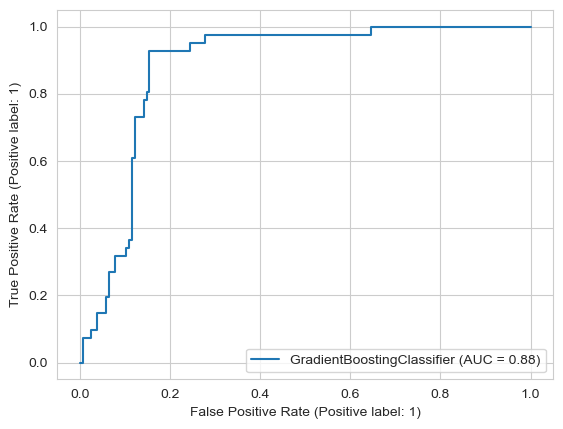

In [137]:
RocCurveDisplay.from_estimator(gd,x_test,y_test)

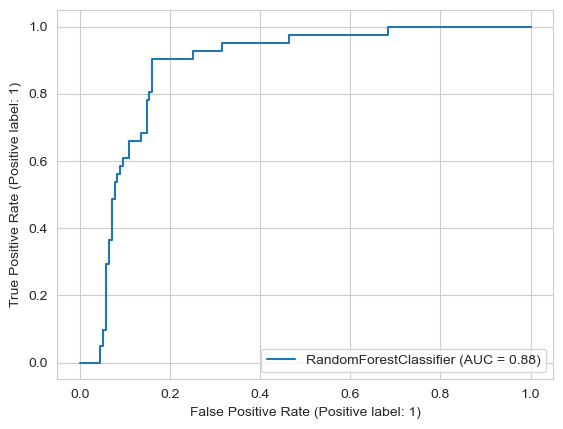

In [138]:
RocCurveDisplay.from_estimator(mod,x_test,y_test)

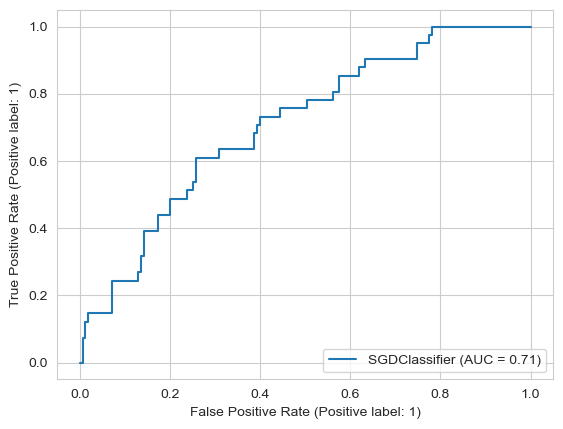

In [139]:
RocCurveDisplay.from_estimator(sgd,x_test,y_test)

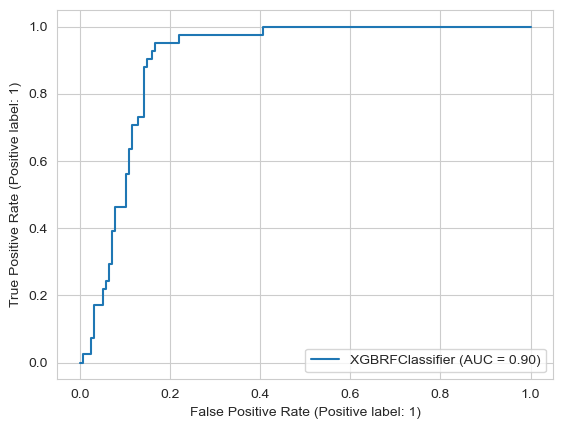

In [140]:
RocCurveDisplay.from_estimator(xgbr,x_test,y_test)

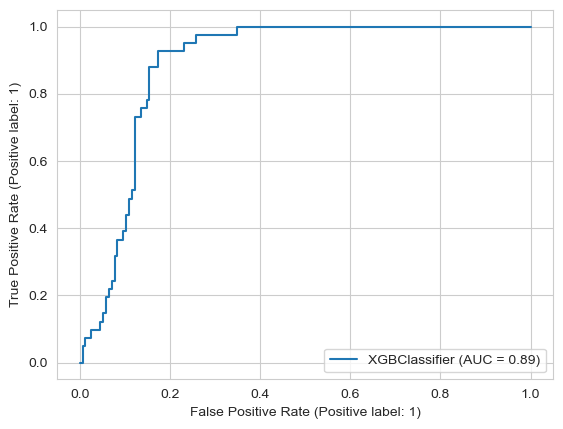

In [141]:
RocCurveDisplay.from_estimator(xgb,x_test,y_test)

### Saving Model

In [142]:
import pickle
filename='Fraud_Detect_Prediction.pkl'
pickle.dump(gd,open(filename,'wb'))

In [143]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=gd.predict(x_test)

print(res)

     Actual  Predict
292       1        1
418       0        0
655       0        1
265       0        0
697       0        1
247       1        1
973       1        1
859       0        0
424       1        1
671       0        0
566       0        0
713       1        1
515       0        0
688       0        0
990       0        0
149       1        0
230       0        0
414       0        0
876       0        0
223       0        0
520       0        0
298       0        0
507       0        0
679       0        0
453       0        0
742       1        1
998       0        1
371       0        0
442       1        1
955       0        0
683       1        1
886       0        0
123       0        0
549       0        0
182       0        0
455       0        0
573       1        0
370       0        1
443       0        0
396       0        1
938       1        1
303       0        0
274       0        0
209       0        0
869       1        1
89        1        1
588       0  